1. Inverted Images
2. Rescaling
3. Binarization
4. Noise Removal
5. Dilation and Erosion
6. Rotation / Deskewing
7. Removing Borders
8. Missing Borders
9. Transparency / Alpha Channel

## 00: Opening an Image

In [1]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [2]:
import cv2
import numpy
from matplotlib import pyplot as plt
# image_file = r"Screenshot 2023-09-14 135234.png"
image_file = r"D:\Programming\ReceiptWise\ReceiptWise-Scan-Receipt\E-receipt-Dataset\scb\IMG_0704.JPG"
img = cv2.imread(image_file)

In [3]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

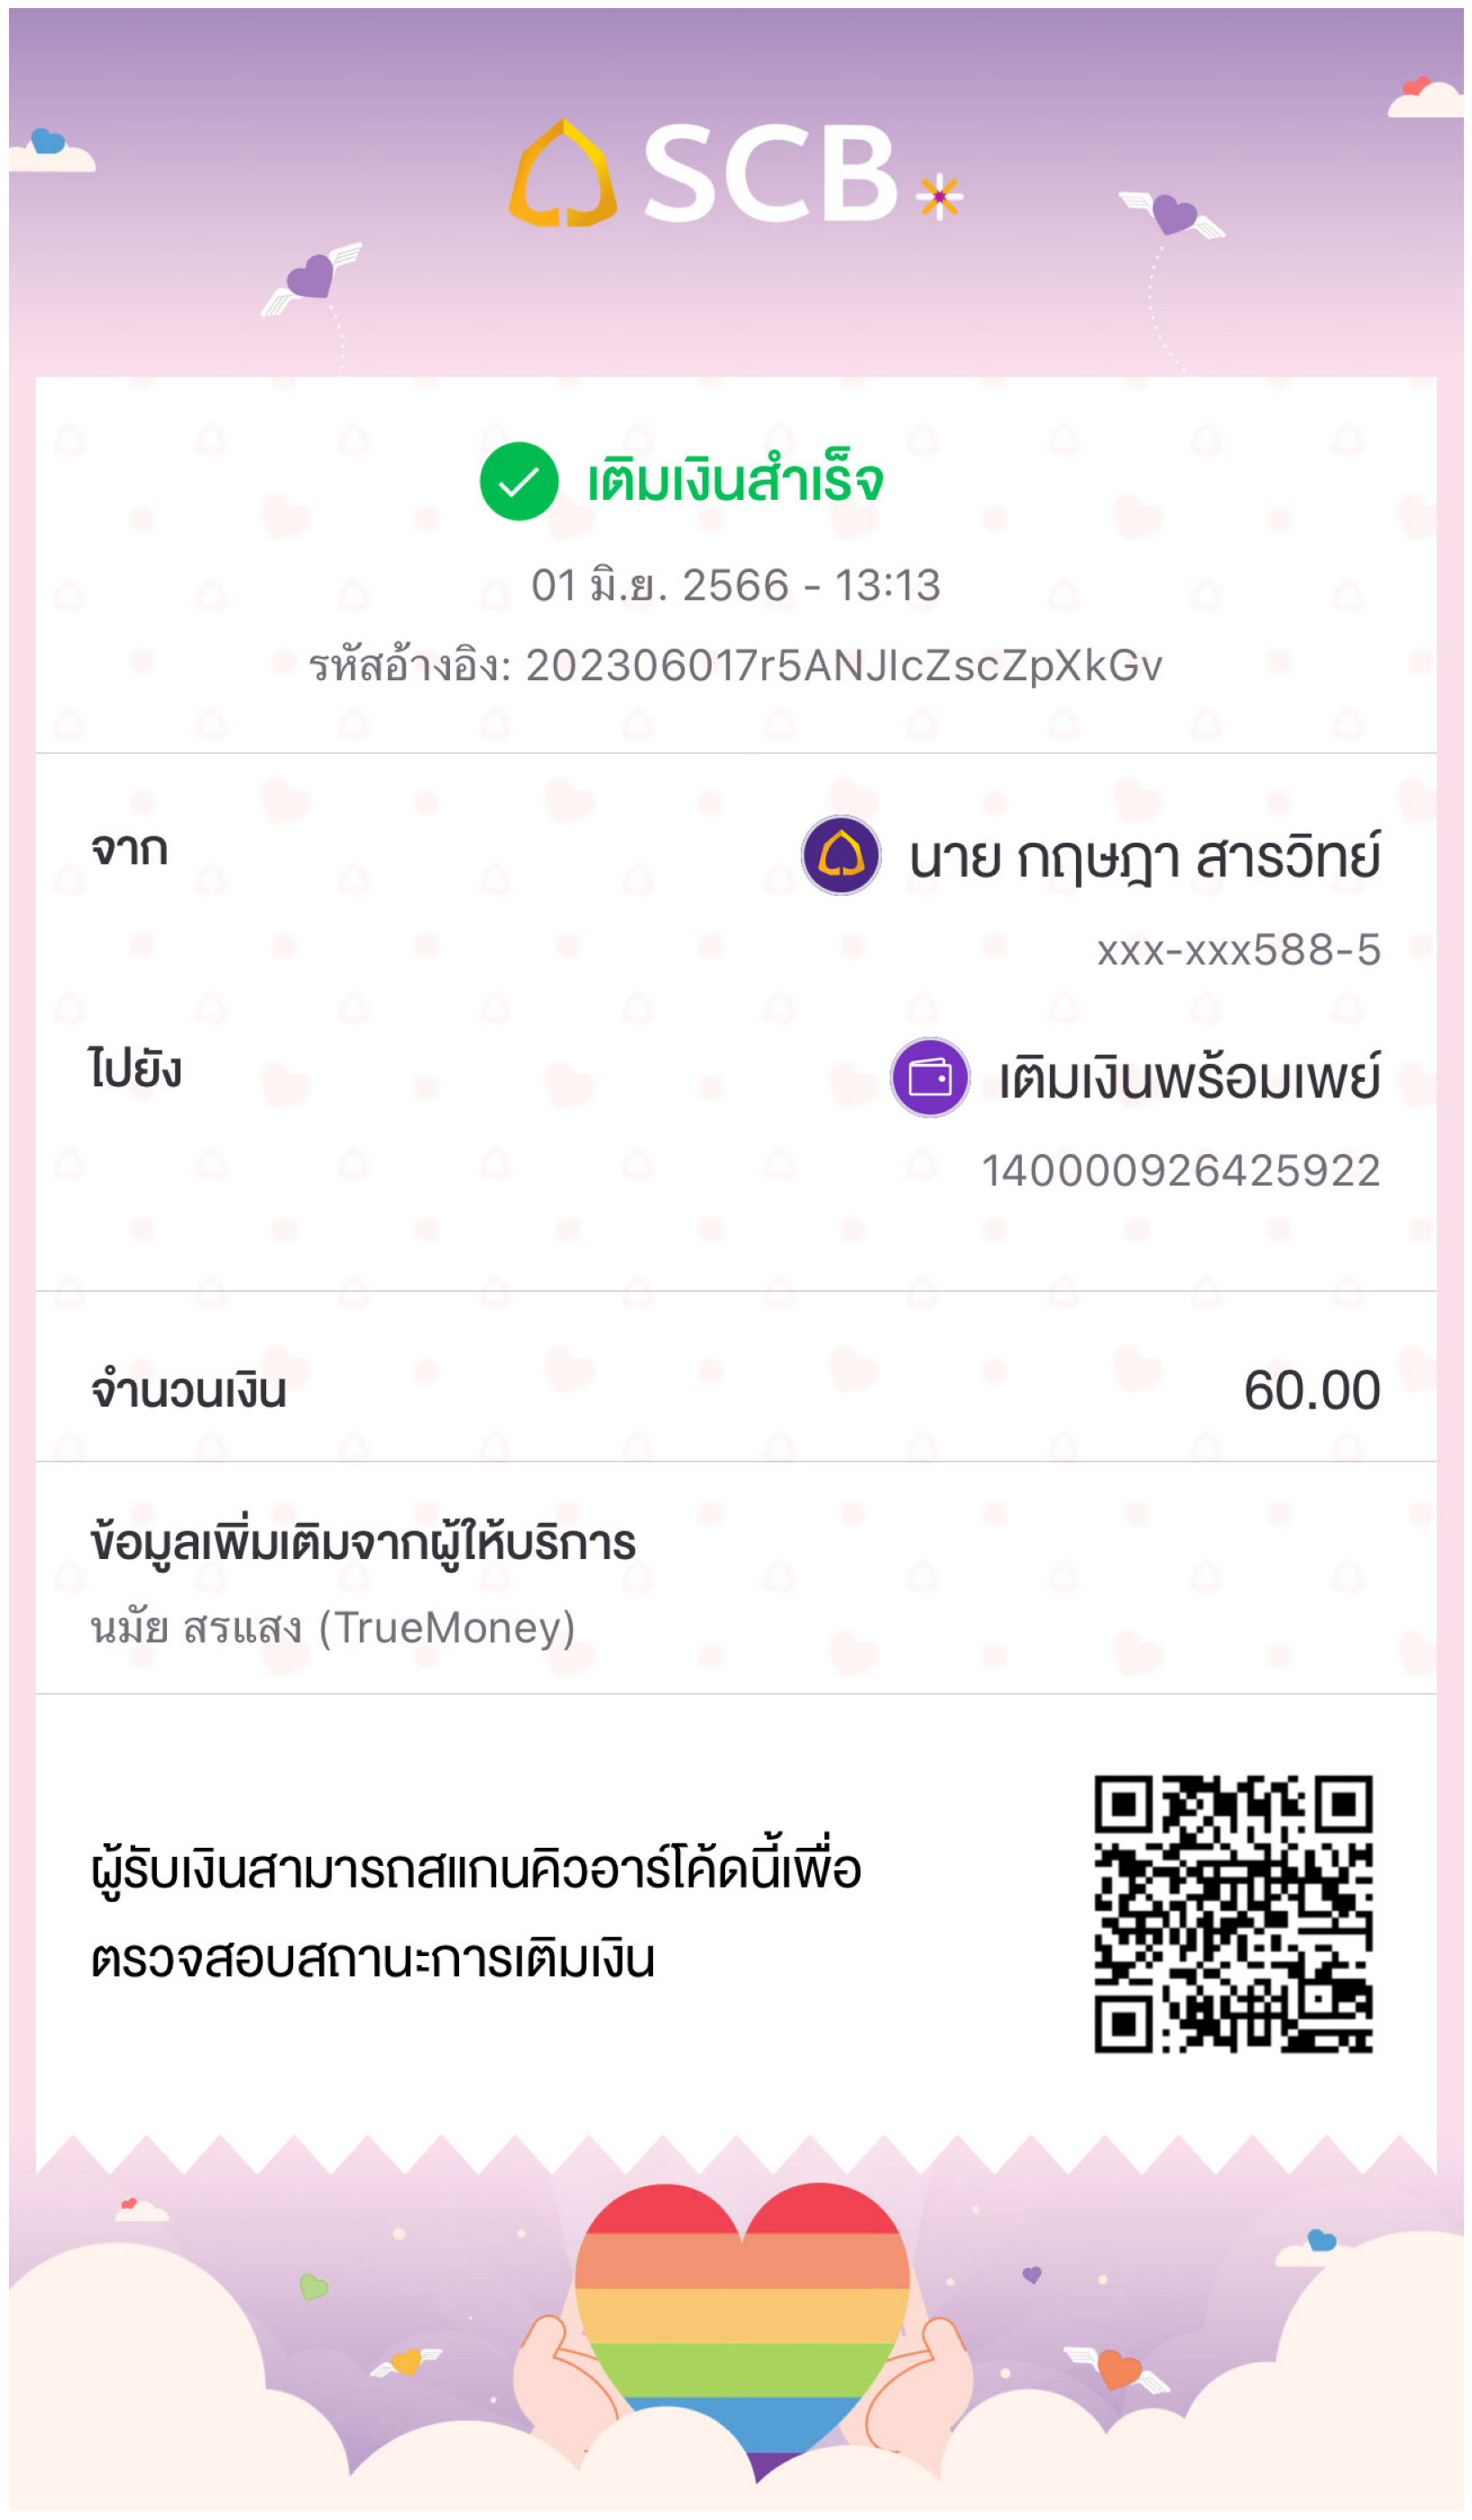

In [4]:
display(image_file)

## 01: Inverted Images

In [5]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("temp/inverted.jpg", inverted_image)

True

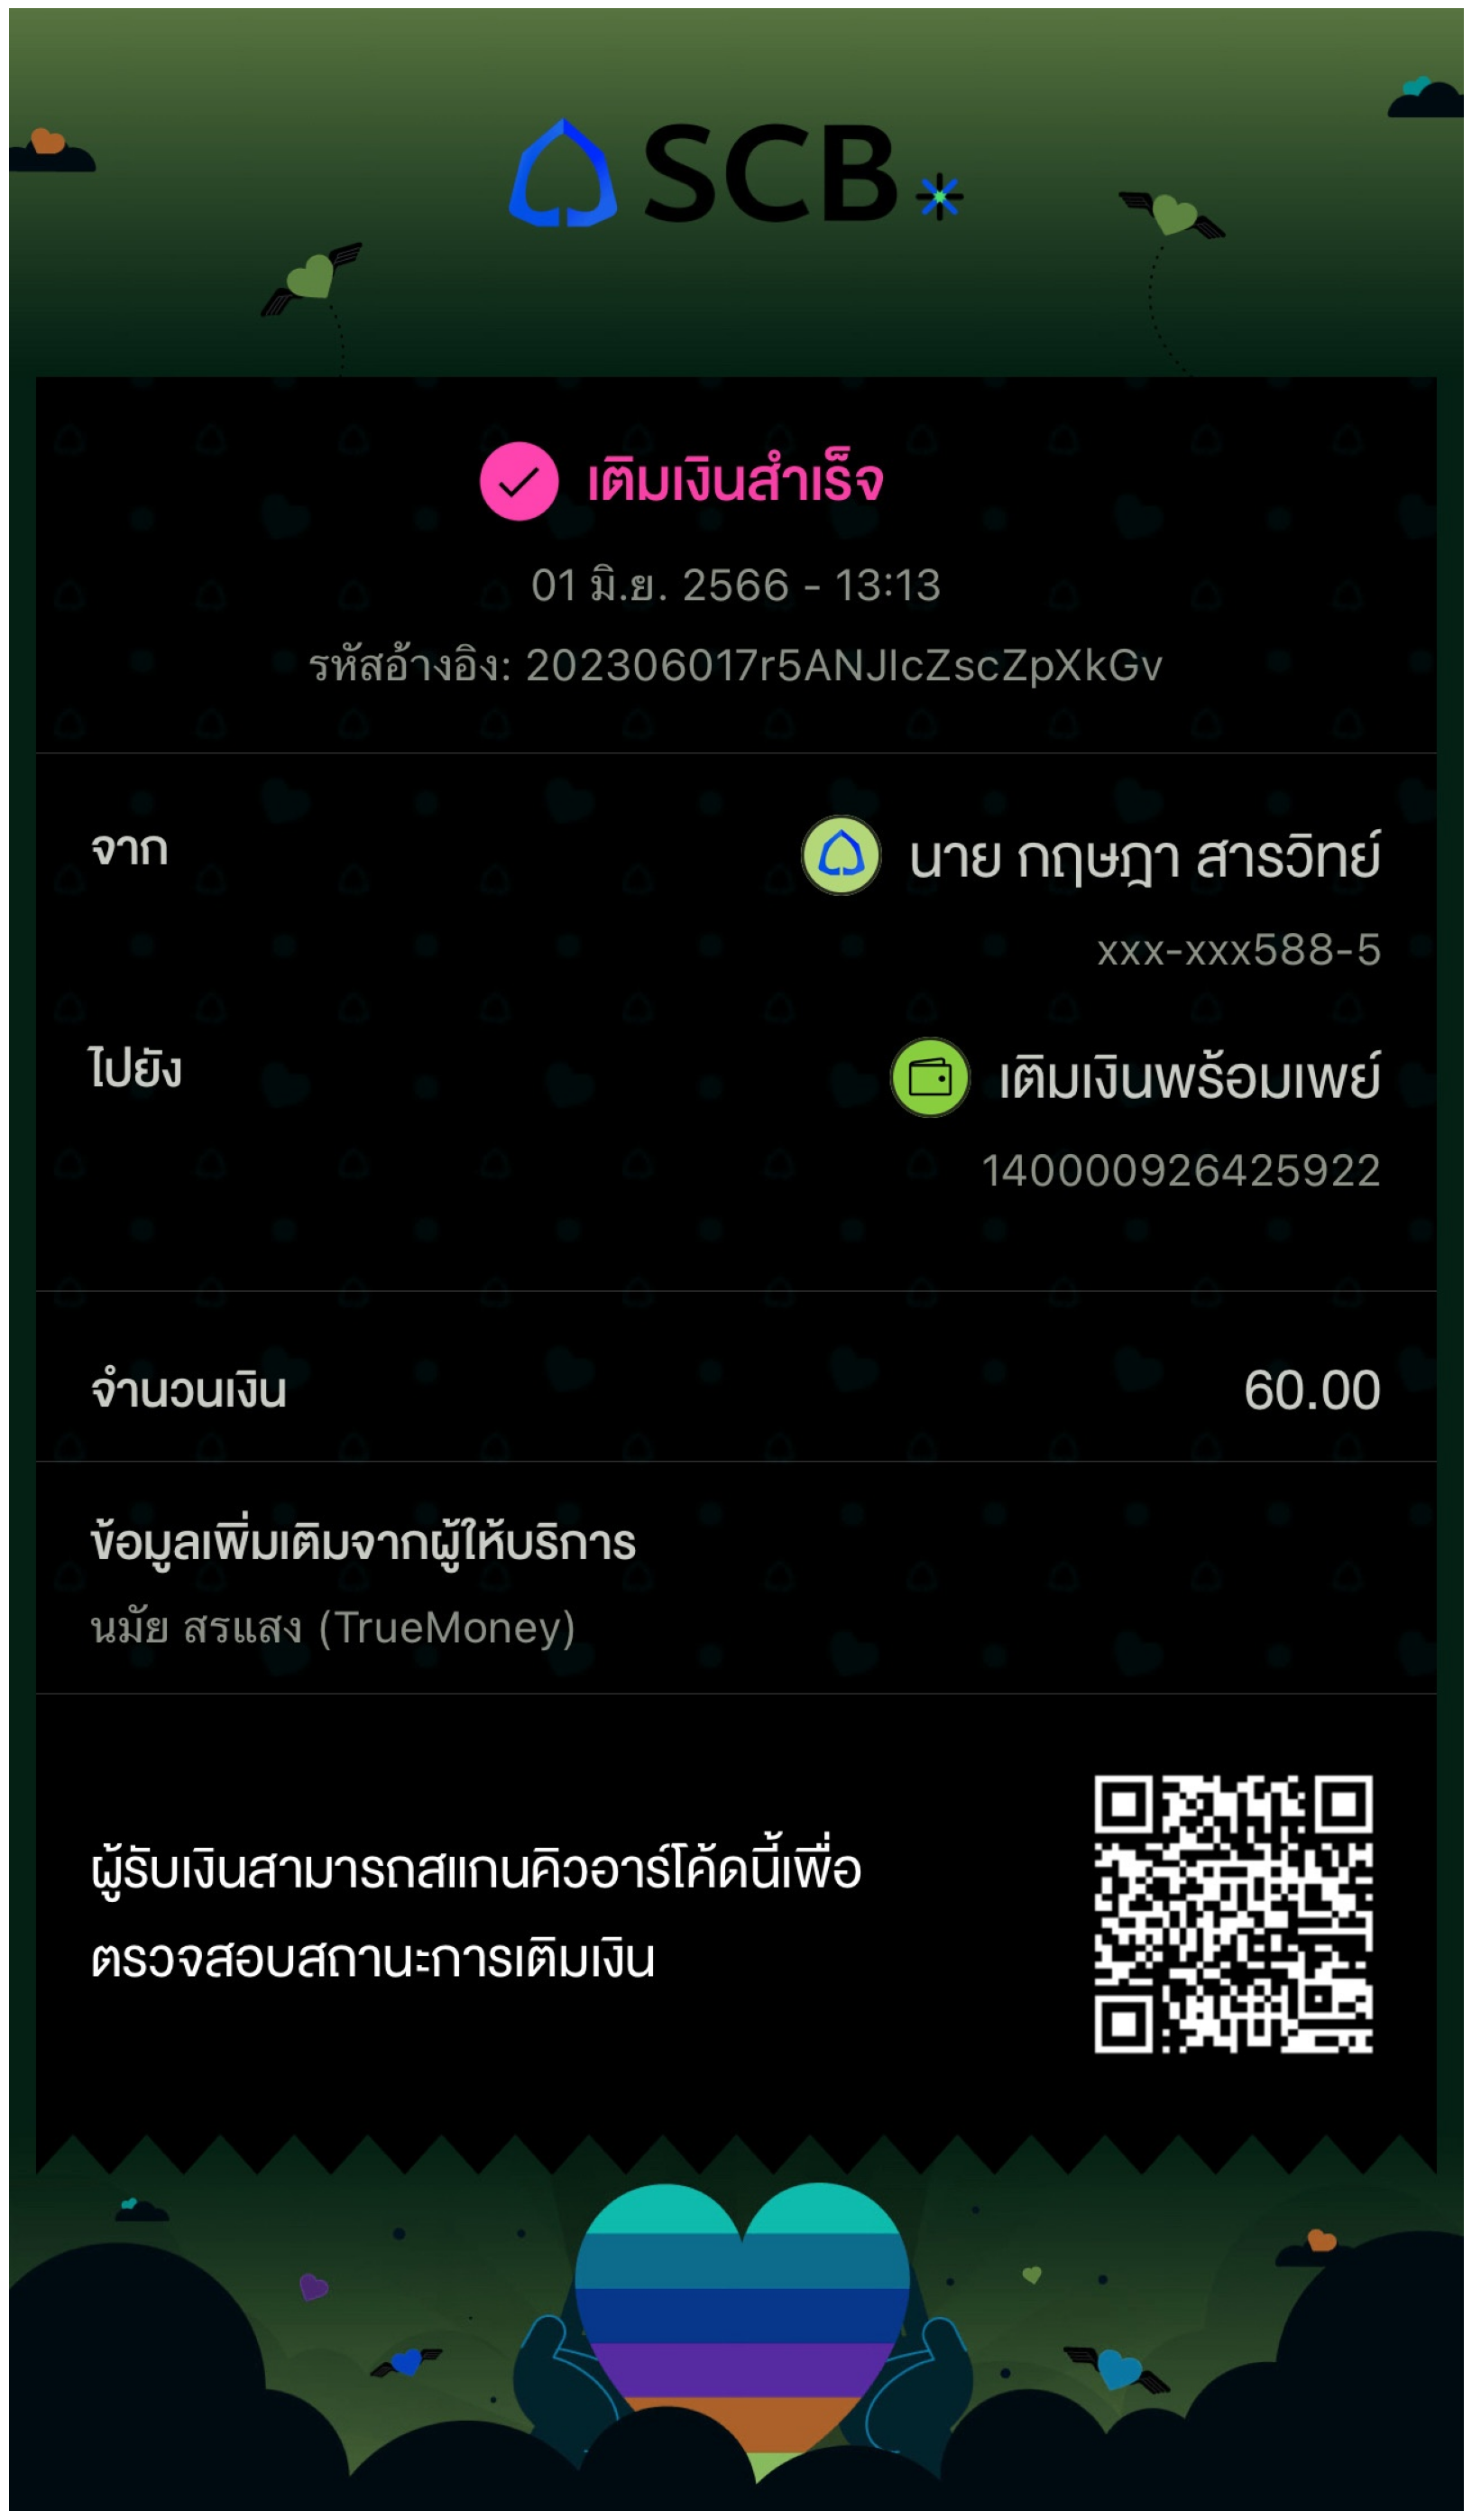

In [6]:
display("temp/inverted.jpg")

## 02: Rescaling

## 03: Binarization

In [7]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [8]:
gray_image = grayscale(img)
cv2.imwrite("temp/gray.jpg", gray_image)

True

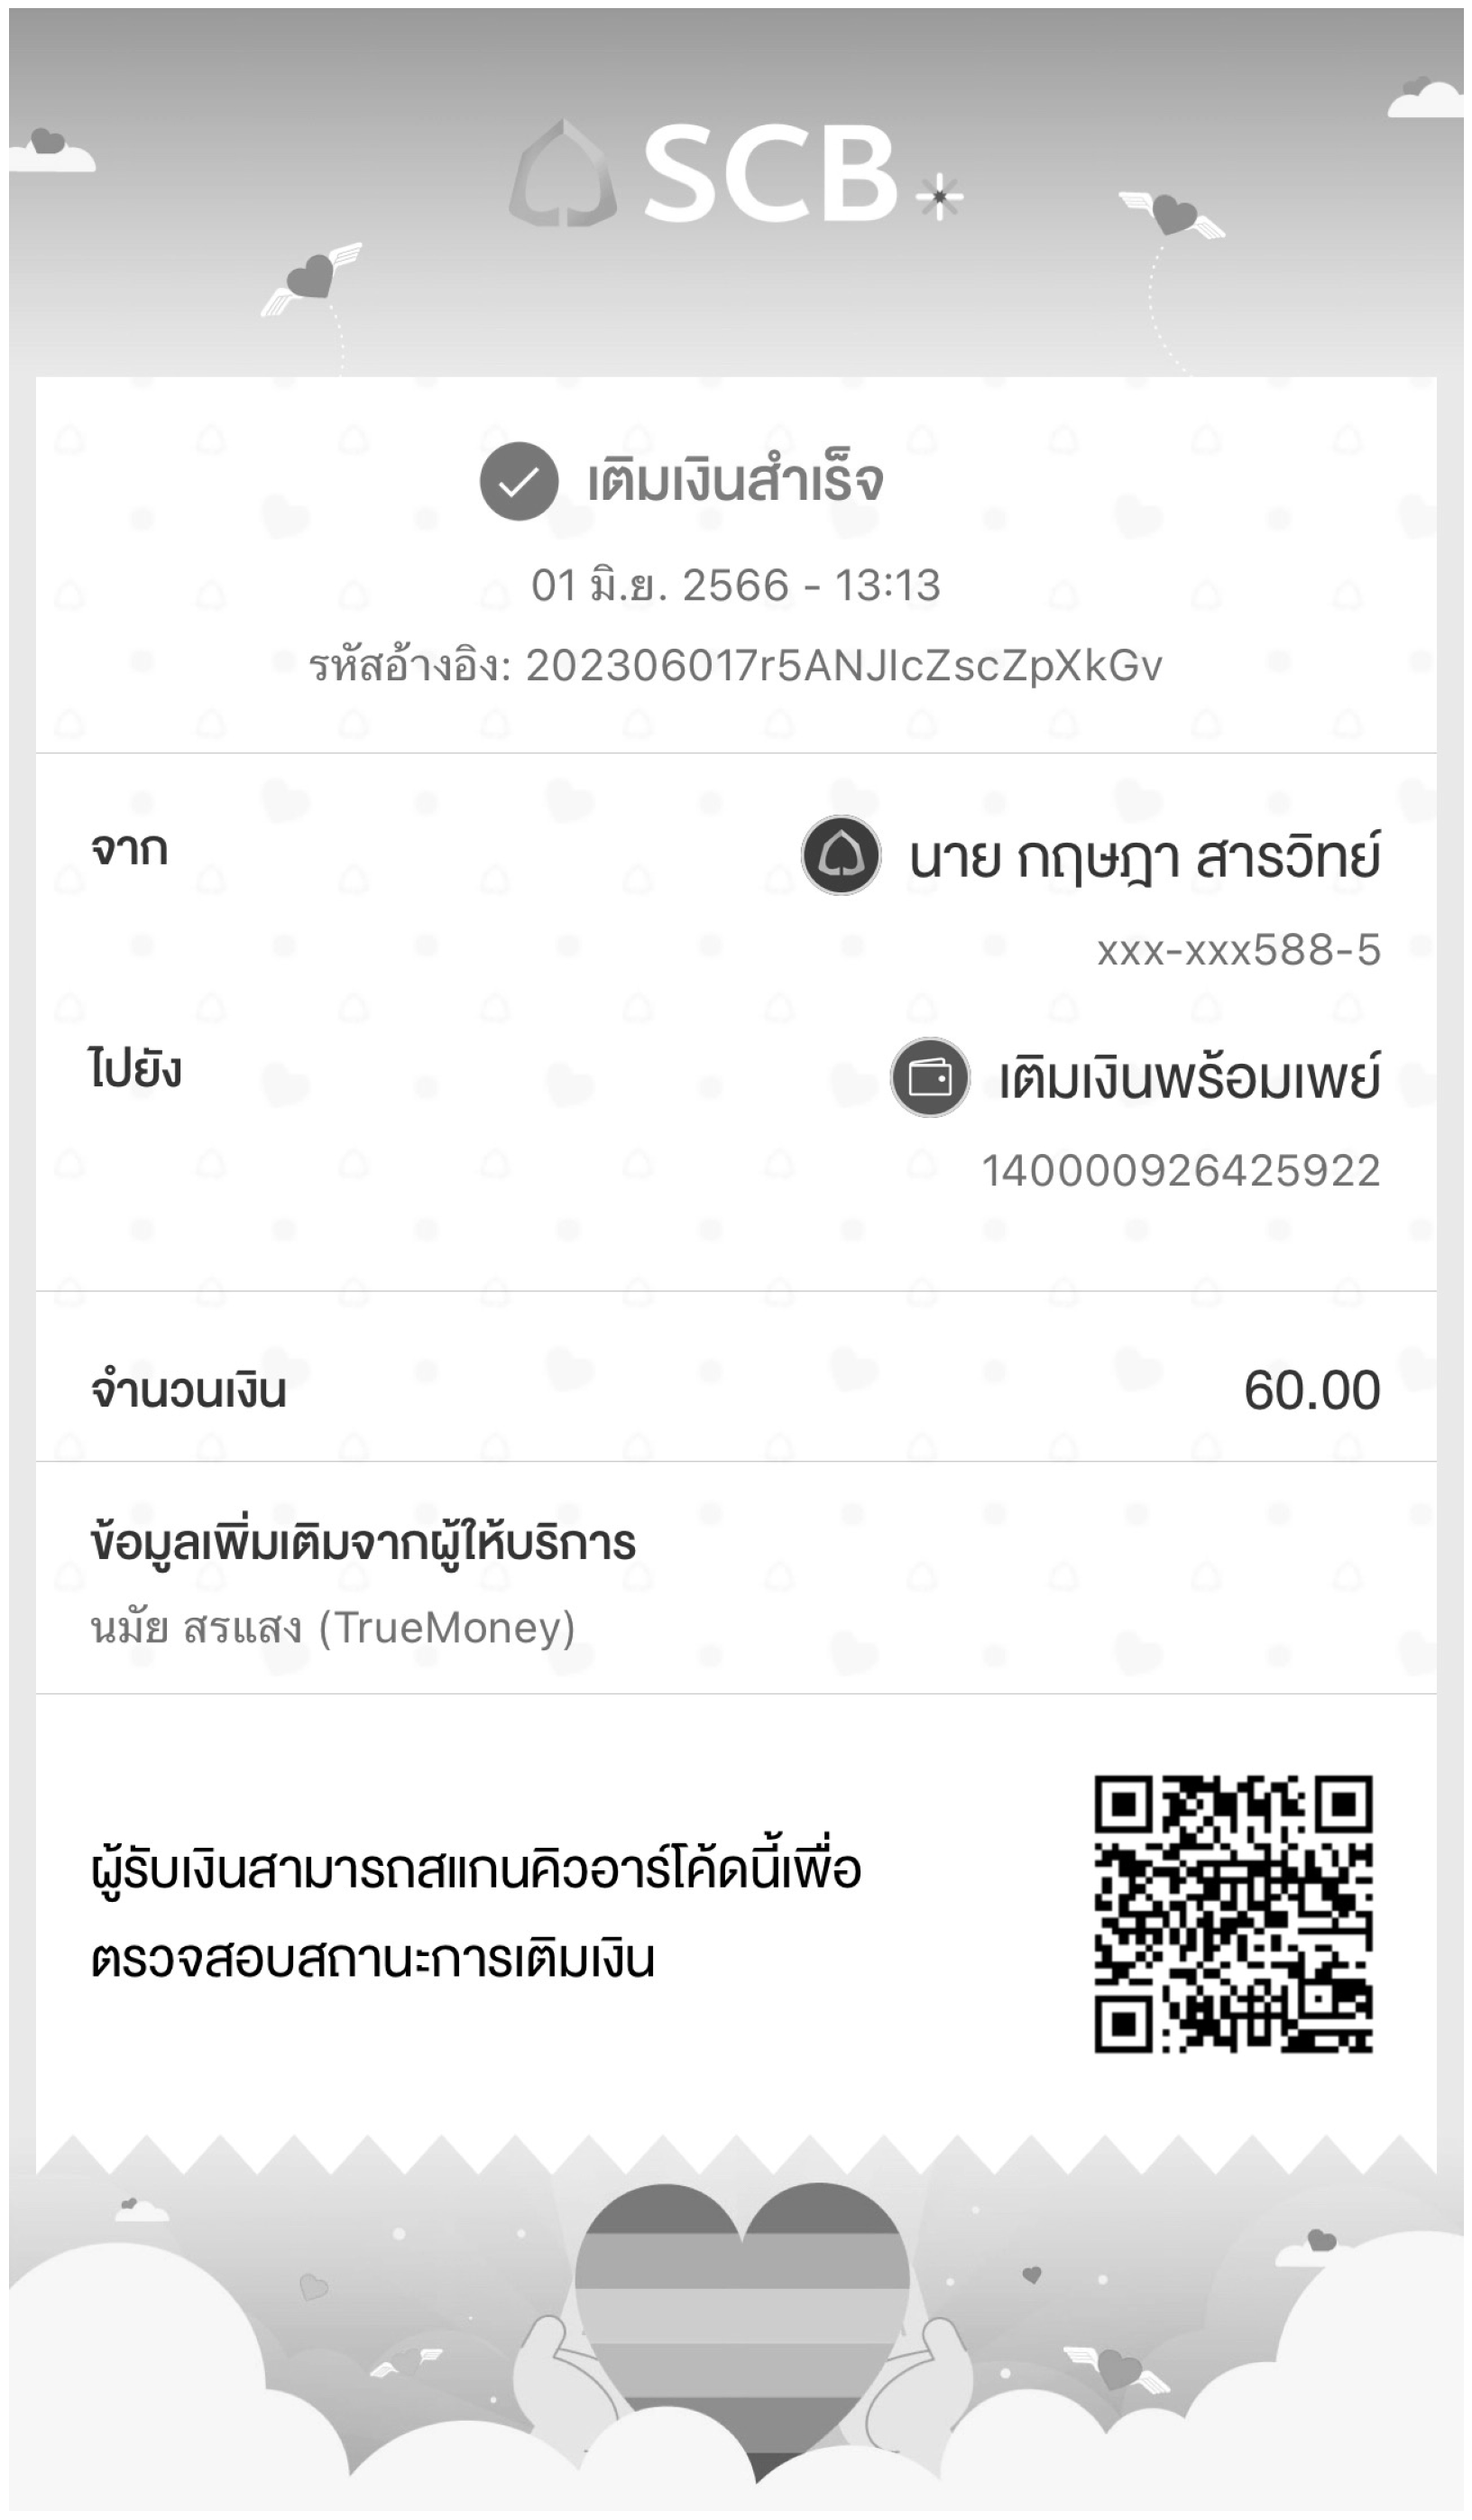

In [9]:
display("temp/gray.jpg")

In [10]:
# thresh, im_bw = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
thresh, otsu = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imwrite("temp/bw_image.jpg", otsu)

True

In [11]:
import easyocr
import torch
import cv2
import matplotlib.pyplot as plt
# Load the Thai model from the thai.pth file
model_path = 'thai.pth'  # Replace 'path_to_thai.pth' with the actual path to your thai.pth file
model = torch.load(model_path, map_location='cpu')

# Create an EasyOCR reader instance with the loaded model
reader = easyocr.Reader(lang_list=['th','en'], model_storage_directory='.')
# Replace 'your_image.jpg' with the path to your image containing Thai text
results = reader.readtext(otsu,paragraph=True,detail=1,add_margin=0.148,
                          blocklist ='๐๑๒๓๔๕๖๗๘๙¥¢¤£oo*!@#$%^&())_+|?><',min_size =30)
for text in results:
    print(text)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[434, 78], [800, 78], [800, 204], [434, 204]], 'sว2']
[[[457, 375], [833, 375], [833, 536], [457, 536]], 'เติมเงินสำเร็จ 01 มิ.ย. 2566 13:13']
[[[256, 549], [1033, 549], [1033, 611], [256, 611]], ' รหัสอ้างอิง: 202306017r5an iczsczpxkgv']
[[[70, 728], [146, 728], [146, 766], [70, 766]], 'จาก']
[[[789, 715], [1232, 715], [1232, 857], [789, 857]], 'นาย กฤษฎา สารวิทย์  xxx xxx588-5']
[[[62, 912], [162, 912], [162, 966], [62, 966]], 'ไปยัง']
[[[857, 913], [1227, 913], [1227, 1055], [857, 1055]], 'เติมเงินพร้อมเพย์ 140000926425922']
[[[62, 1192], [256, 1192], [256, 1255], [62, 1255]], ' จำนวนเงิน']
[[[1088, 1198], [1224, 1198], [1224, 1252], [1088, 1252]], '60.00']
[[[62, 1326], [568, 1326], [568, 1466], [62, 1466]], 'ข้อมูลเพิ่มเติมจากผู้ไห้บธิการ นมัย สรแสง  truemeney]']
[[[61, 1604], [770, 1604], [770, 1756], [61, 1756]], 'ผู้รับเงินสามารถสแกนคิวอาร์โคัดนี้เพื่อ ตรวจสอบสถานะการเติมเงิน']


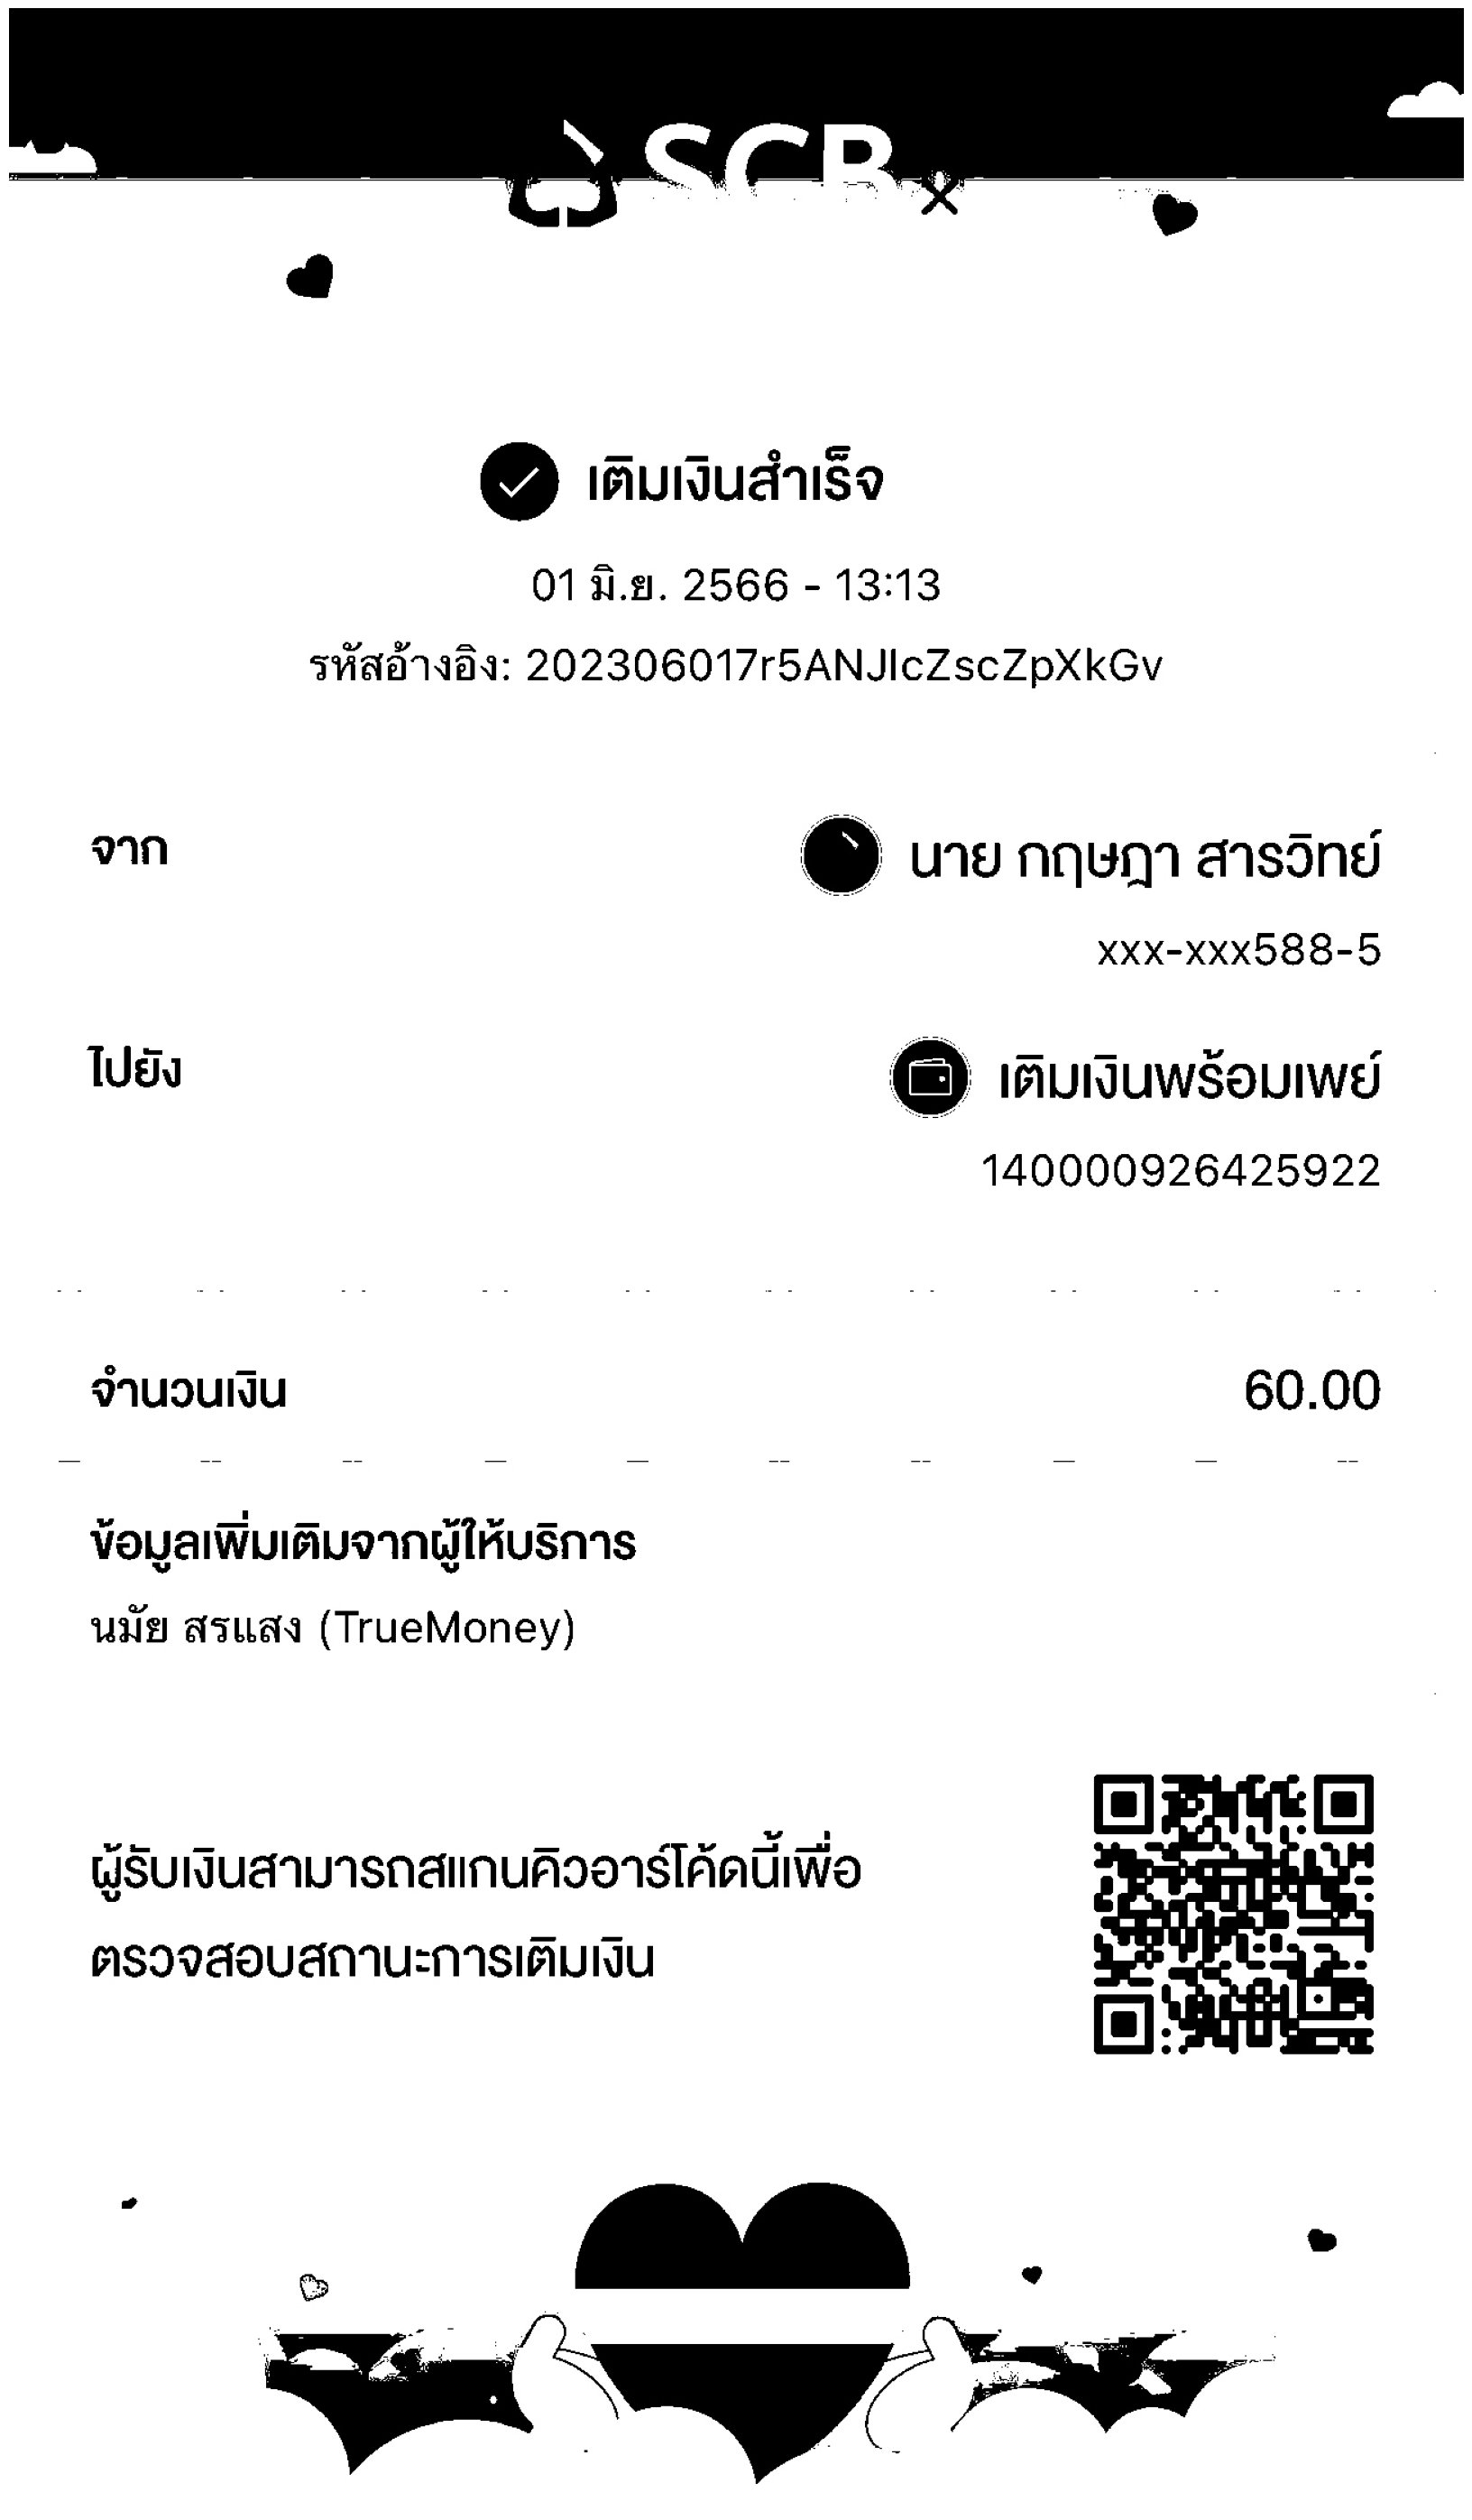

In [12]:
display("temp/bw_image.jpg")

## 04: Noise Removal

In [13]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [14]:
no_noise = noise_removal(otsu)
no_noise = otsu
cv2.imwrite("temp/no_noise.jpg", no_noise)

True

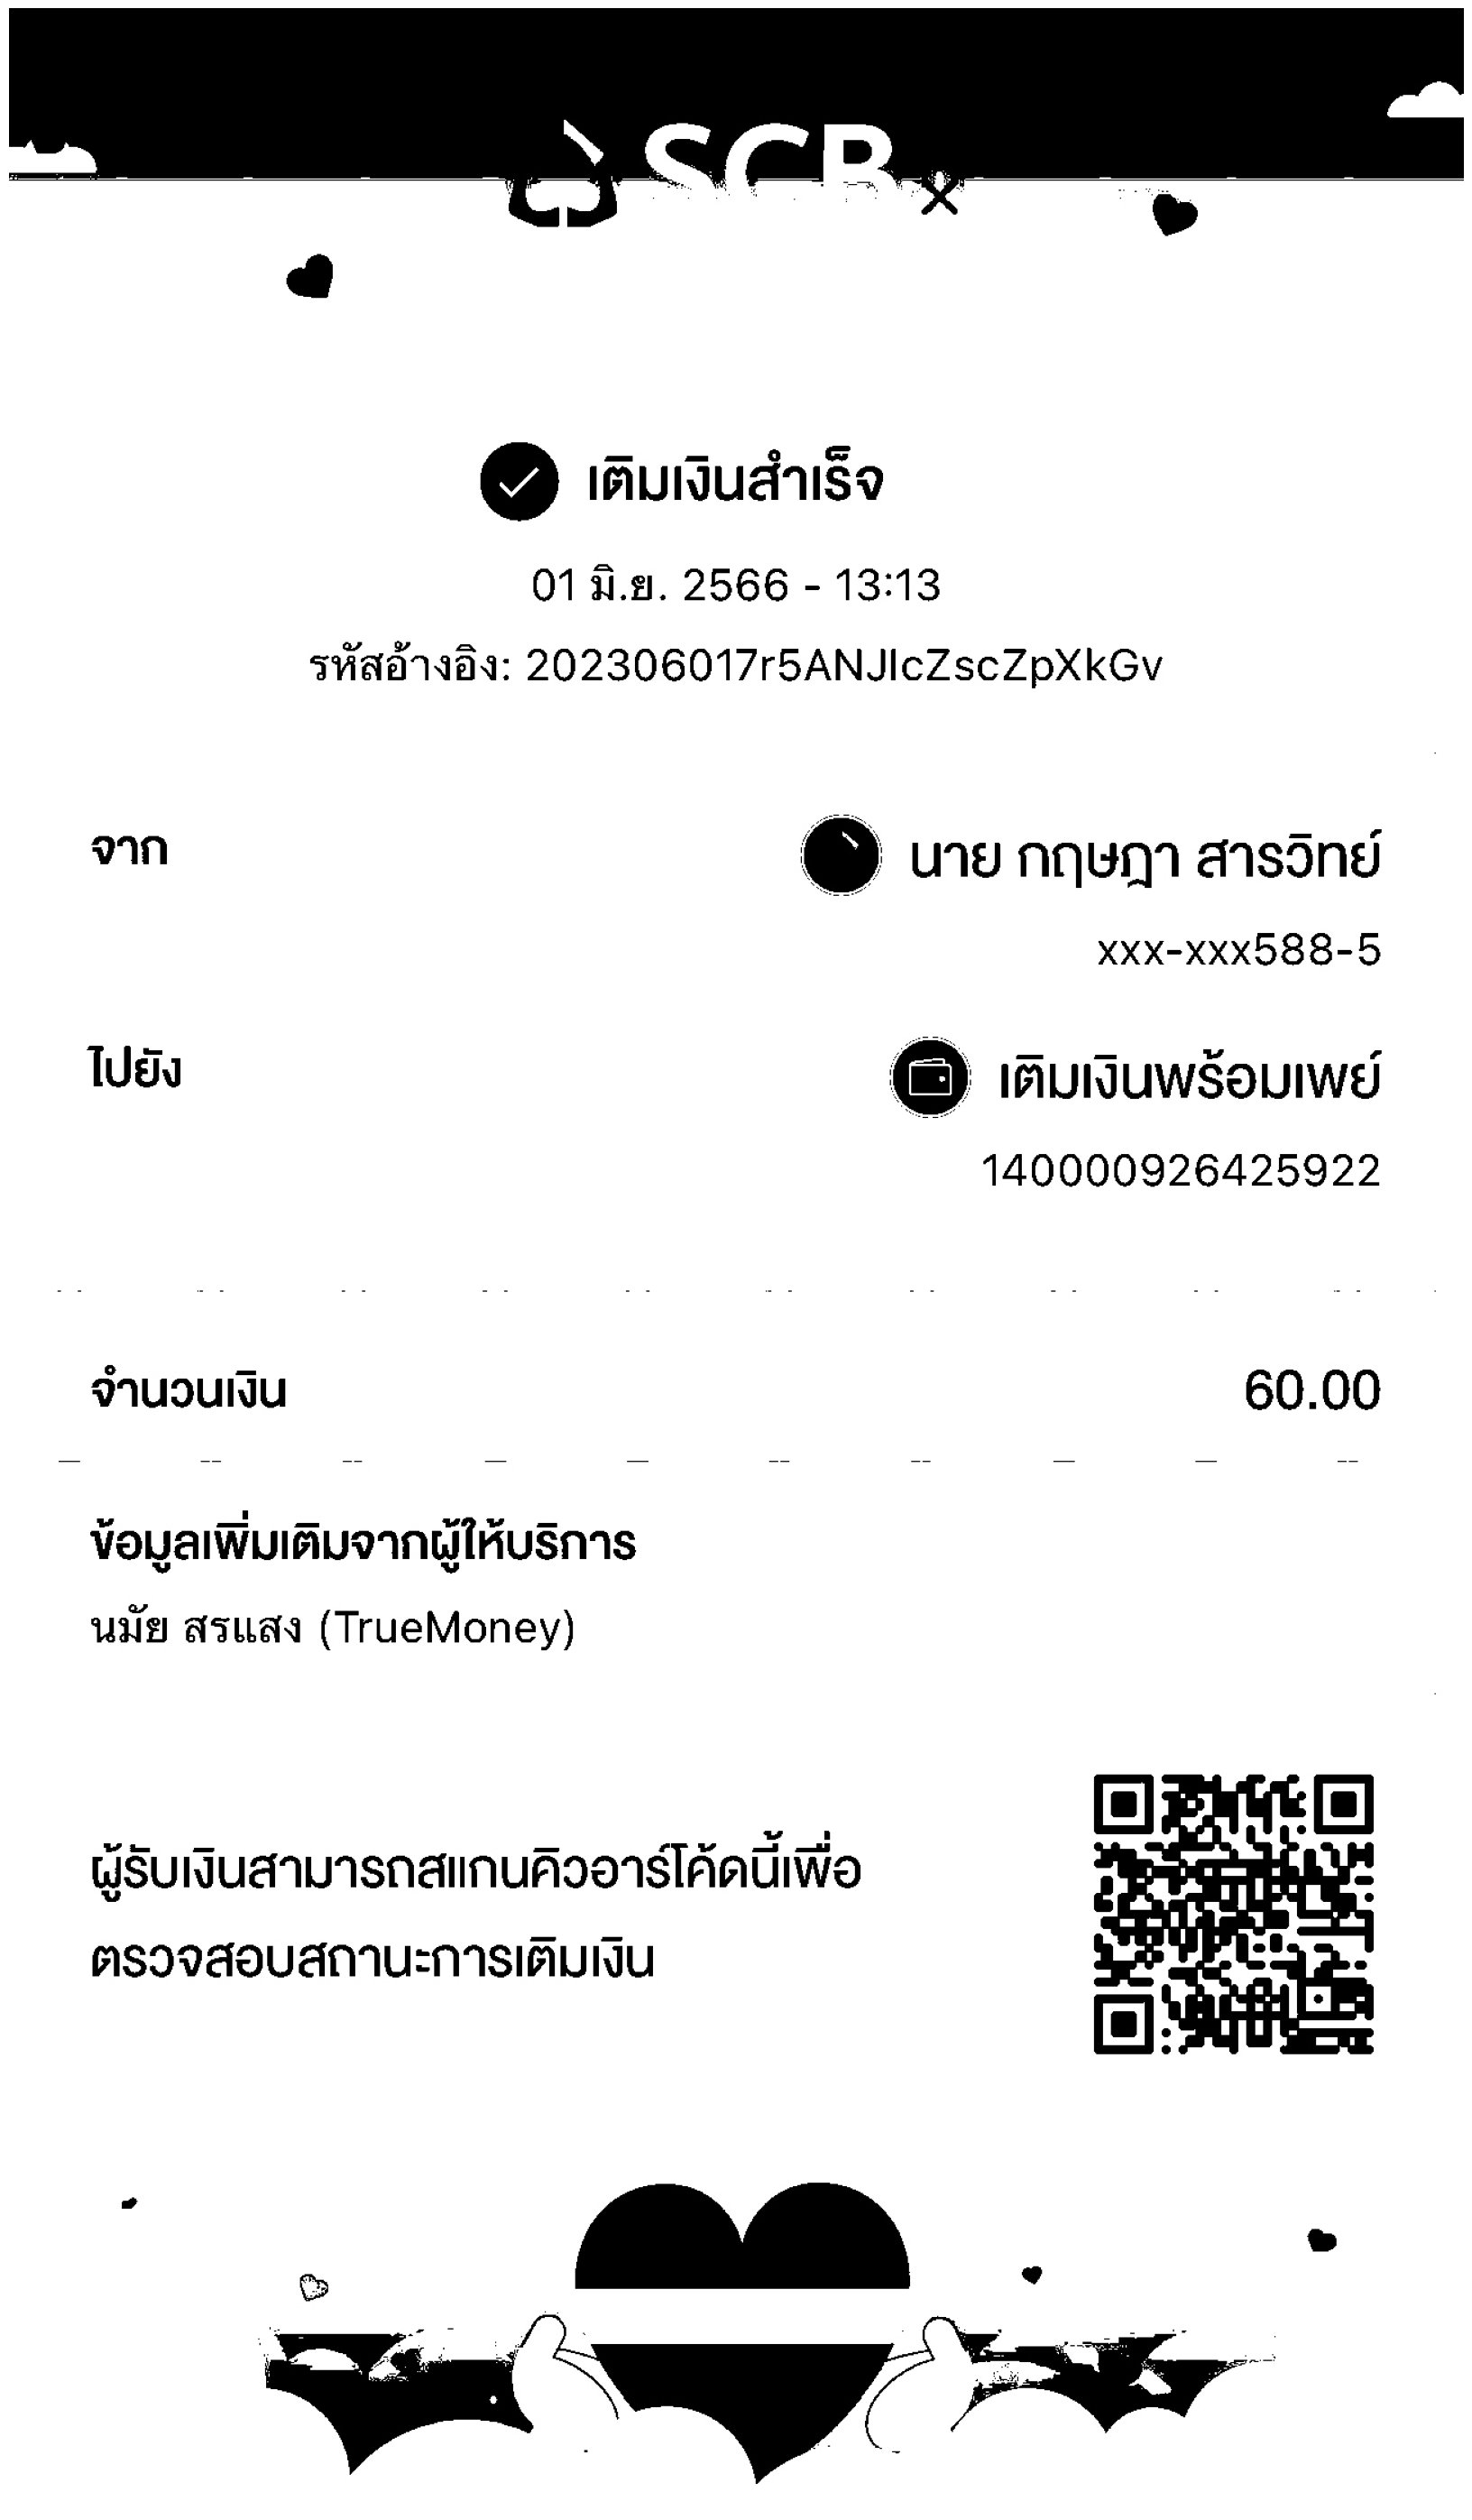

In [15]:
display("temp/no_noise.jpg")

In [16]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [17]:
eroded_image = thin_font(no_noise)
cv2.imwrite("temp/eroded_image.jpg", eroded_image)

True

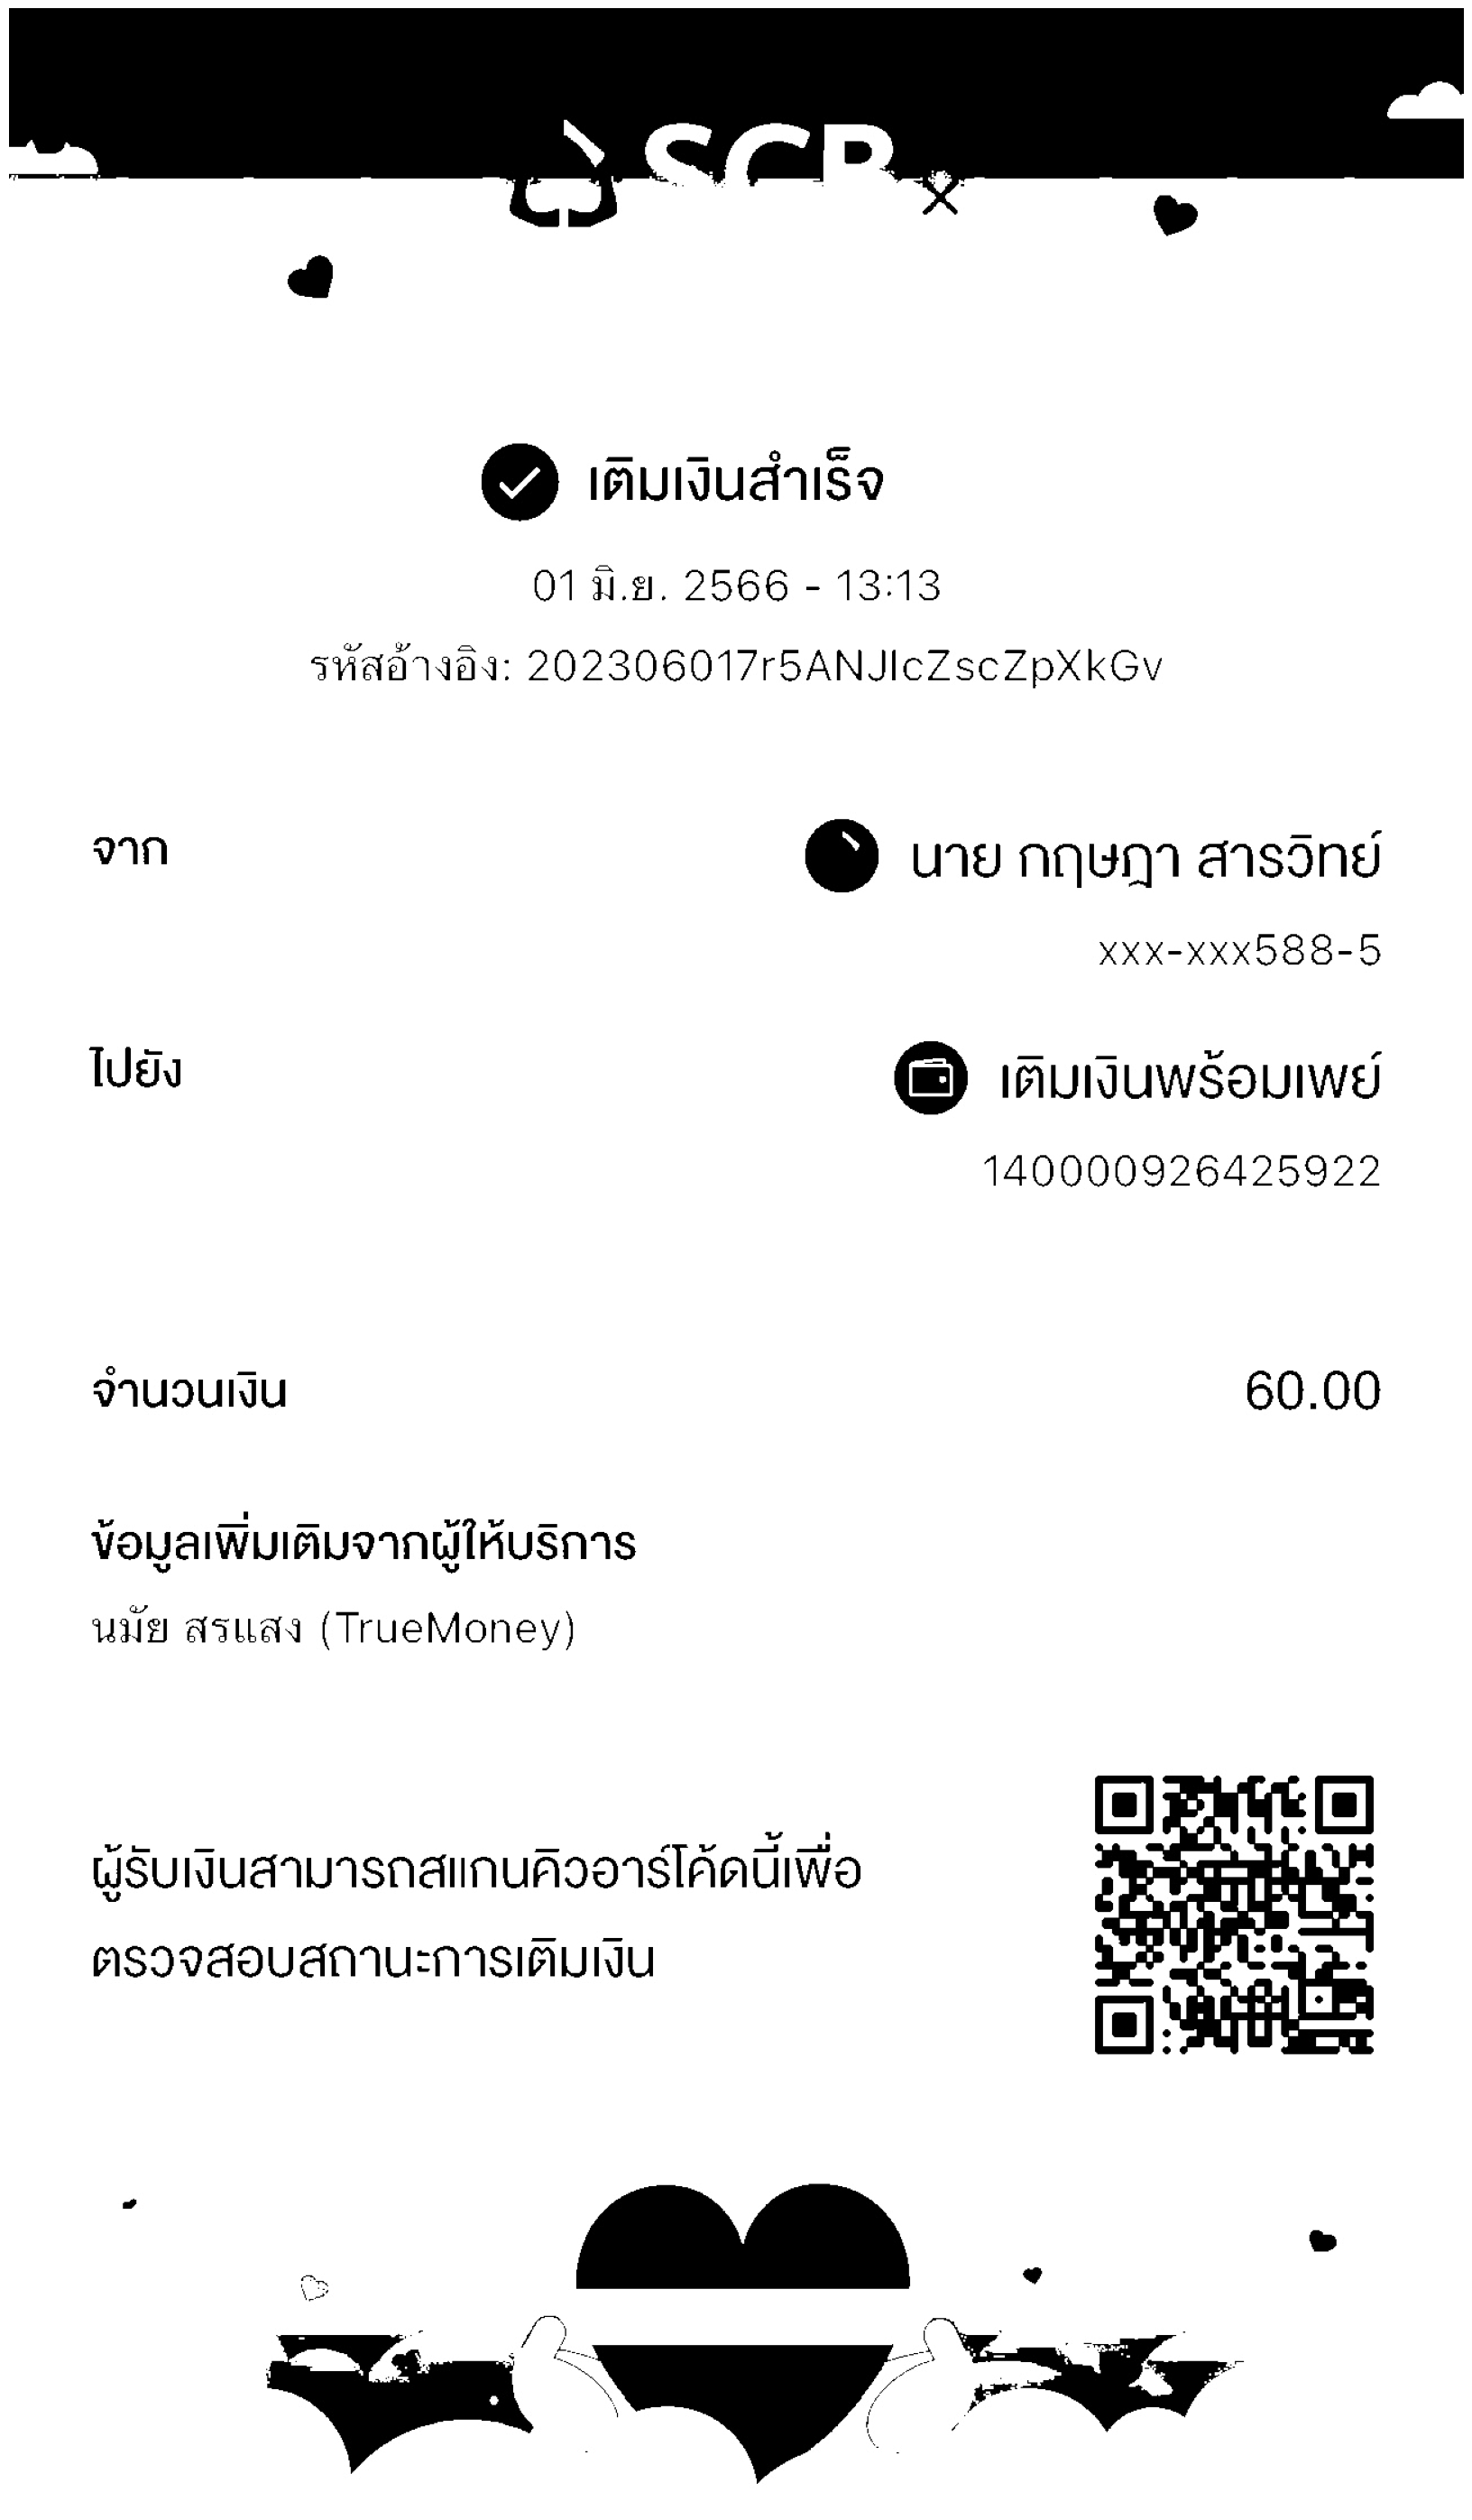

In [18]:
display("temp/eroded_image.jpg")

In [19]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [20]:
dilated_image = thick_font(no_noise)
cv2.imwrite("temp/dilated_image.jpg", dilated_image)

True

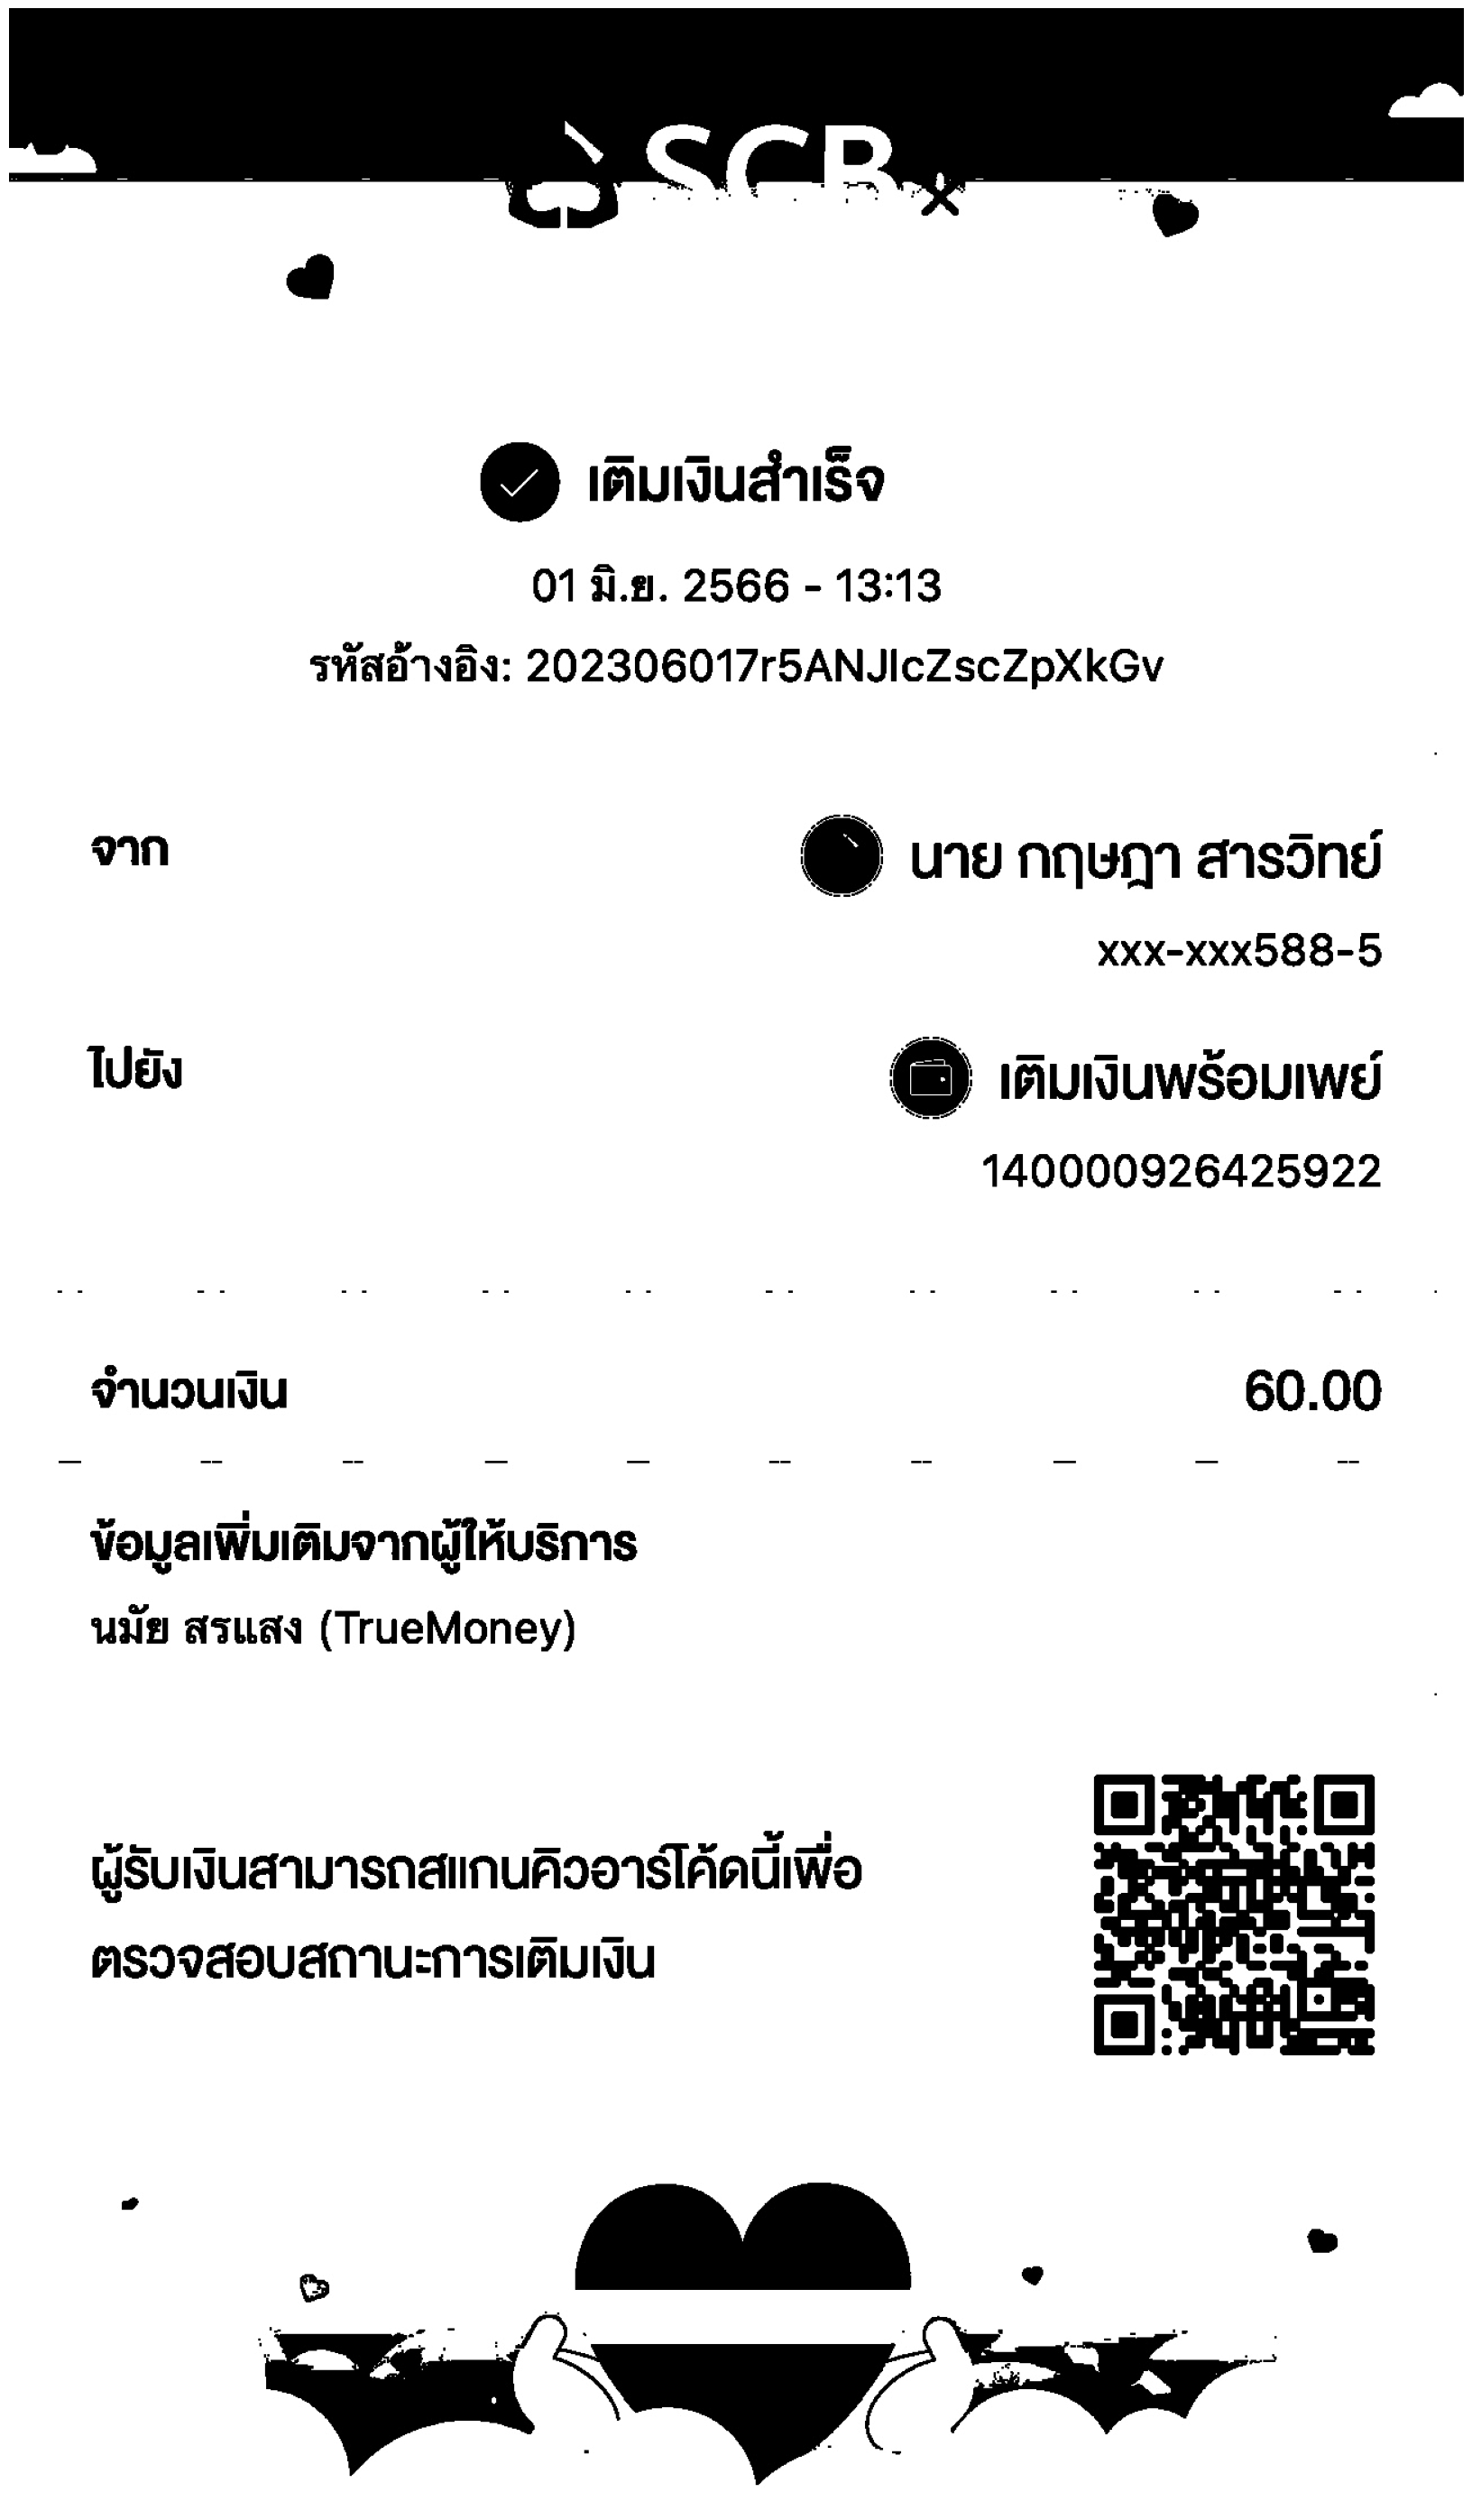

In [21]:
display("temp/dilated_image.jpg")

## 06: Rotation / Deskewing

## 07: Removing Borders

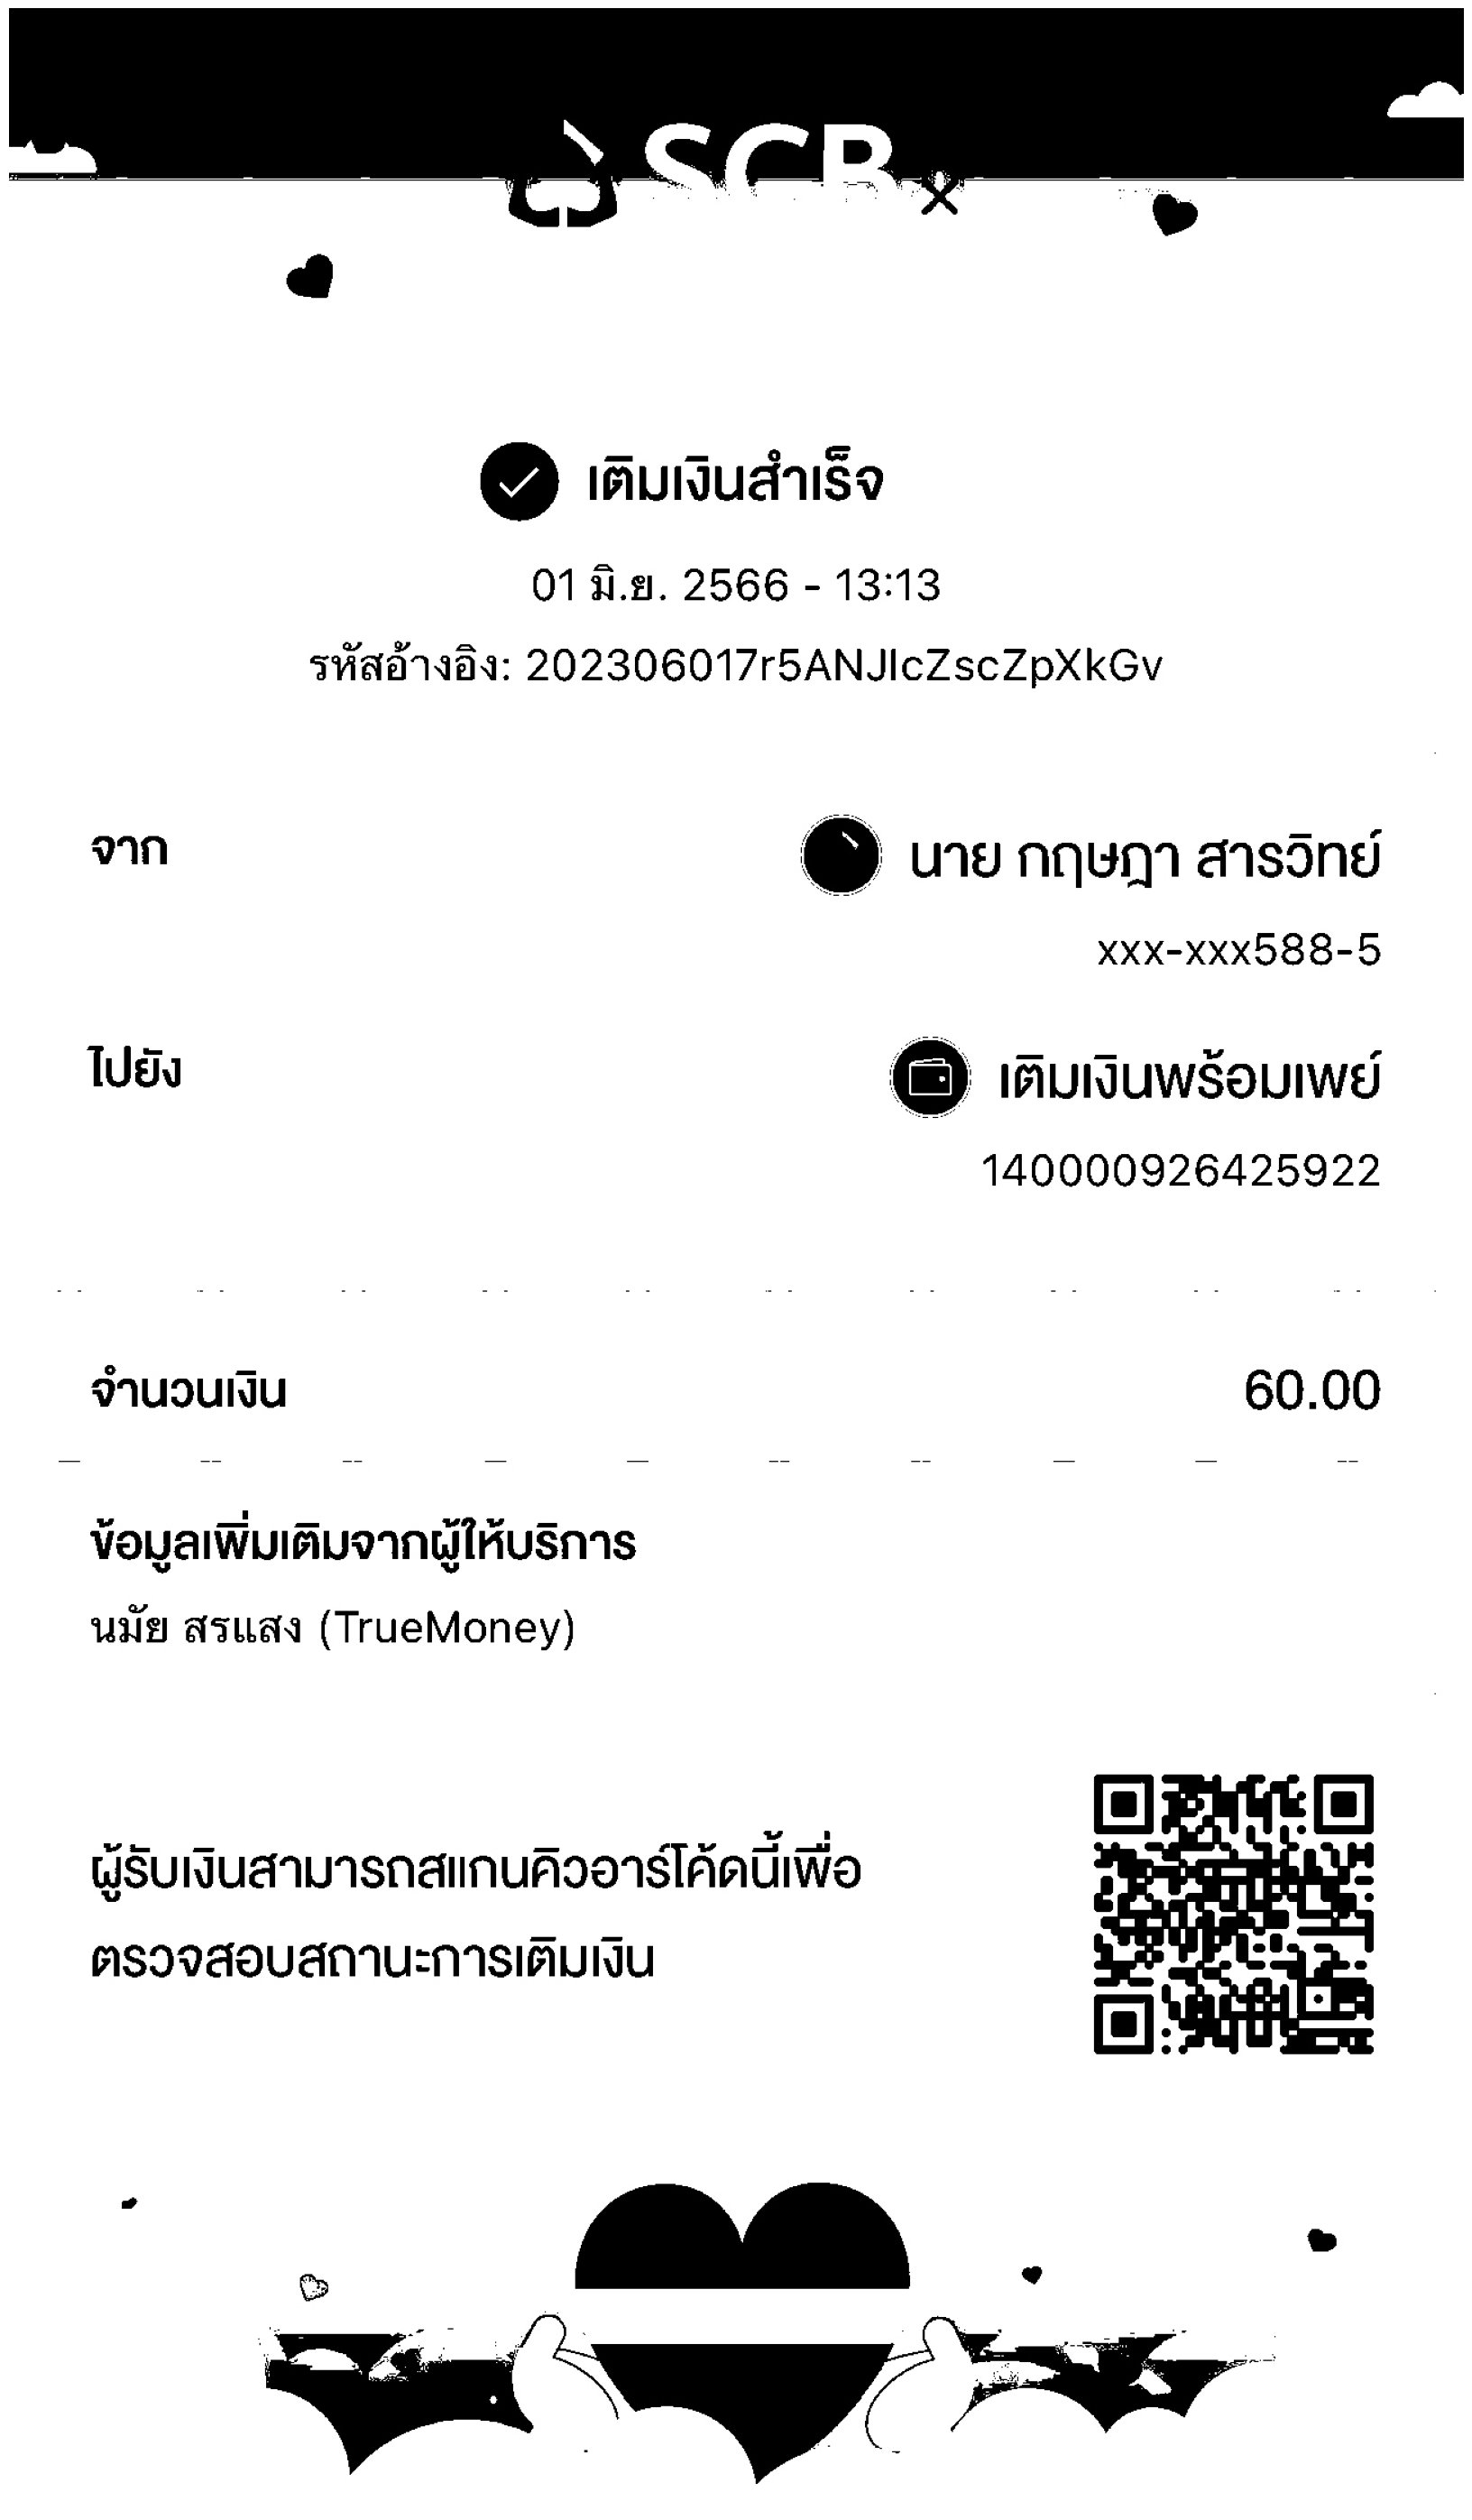

In [22]:
display("temp/no_noise.jpg")

In [23]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

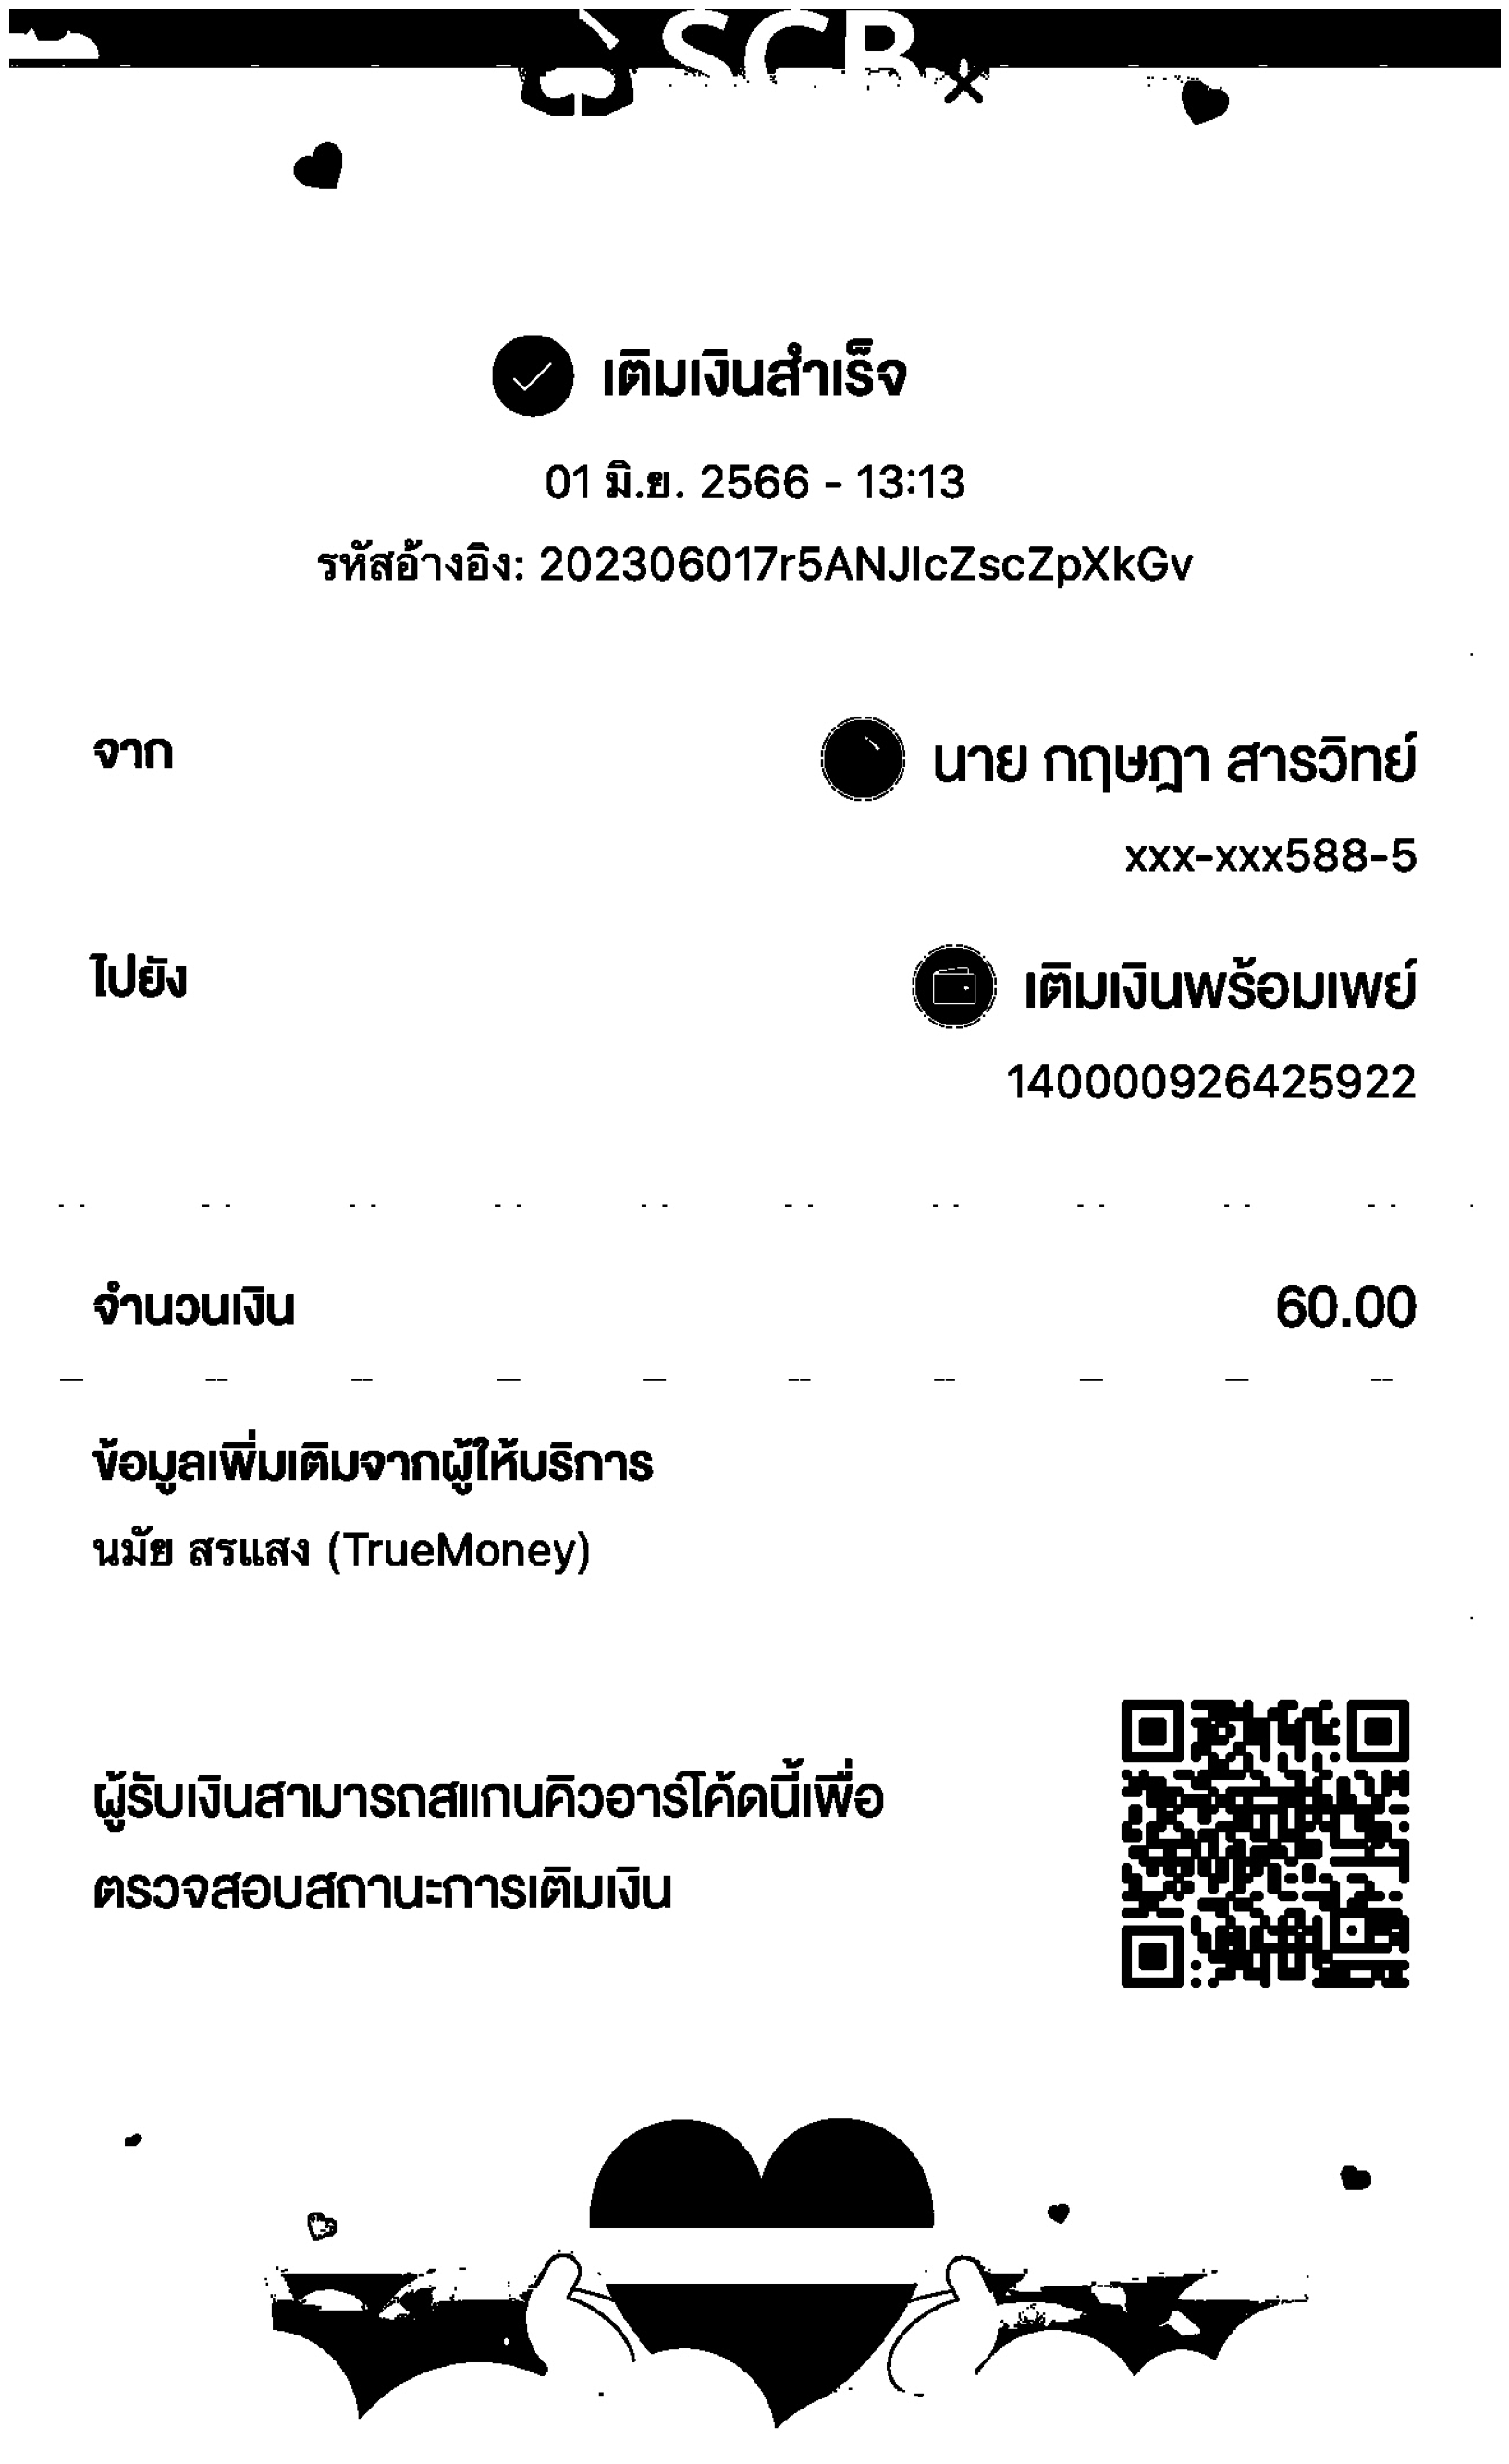

In [24]:
no_borders = remove_borders(dilated_image)
cv2.imwrite("temp/no_borders.jpg", no_borders)
display('temp/no_borders.jpg')

## 08: Missing Borders

In [25]:
color = [255, 255, 255]
top, bottom, left, right = [150]*4

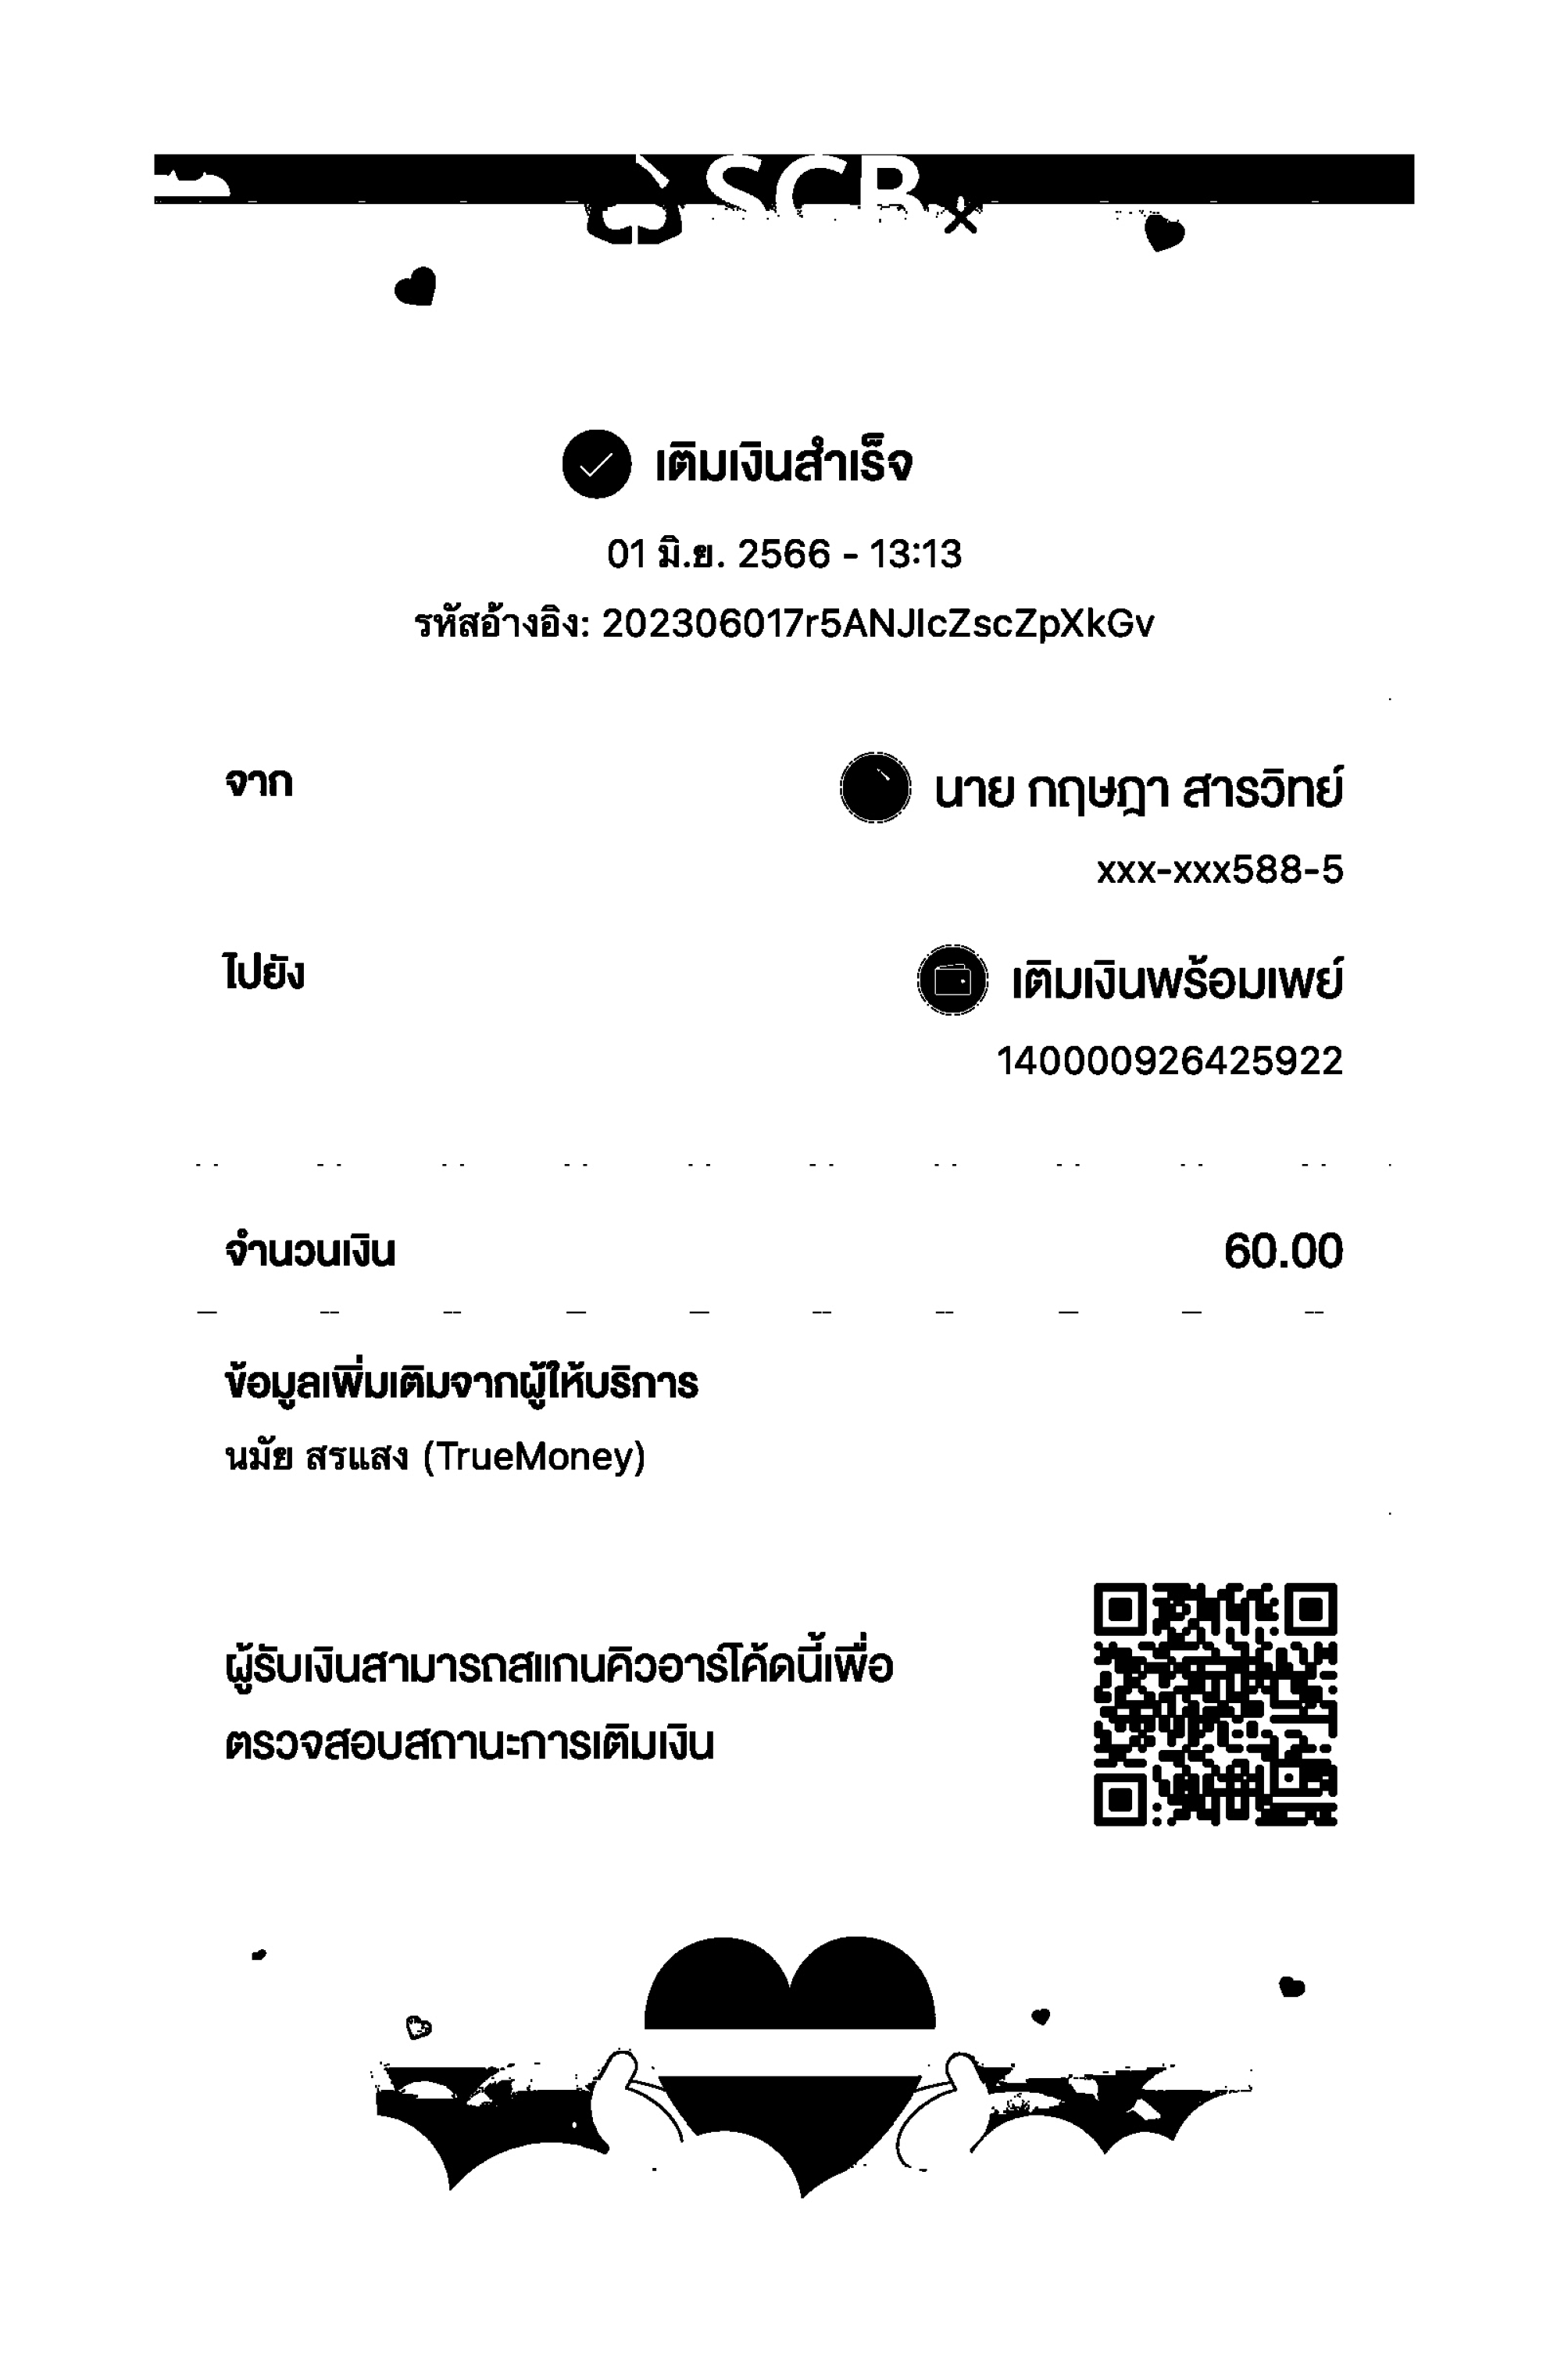

In [26]:
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("temp/image_with_border.jpg", image_with_border)
display("temp/image_with_border.jpg")

## 09: Transparency / Alpha Channel

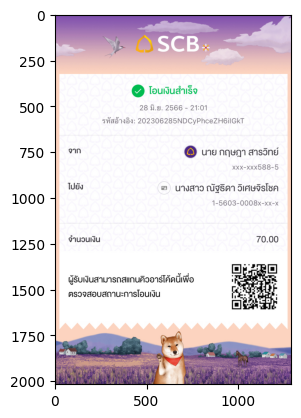

In [34]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io,measure
img = io.imread(r'E-receipt-Dataset\scb\IMG_1063.JPG')
plt.imshow(img)

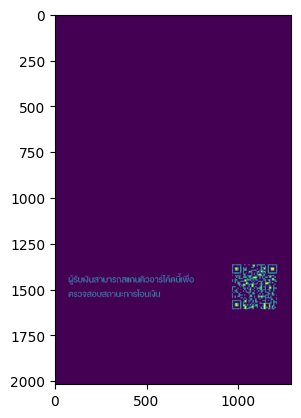

In [48]:
## convert to hsv
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
# mask = cv2.inRange(hsv,(100,90,90),(120,255,255)) #blue
mask = cv2.inRange(hsv,(0,0,0),(0,0,0)) #blue

plt.imshow(mask)

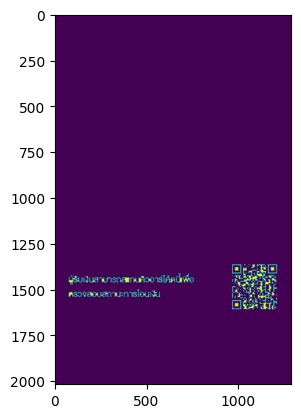

In [49]:
from scipy import ndimage as nd
closed_mask = nd.binary_closing(mask,np.ones((7,7)))
plt.imshow(closed_mask)

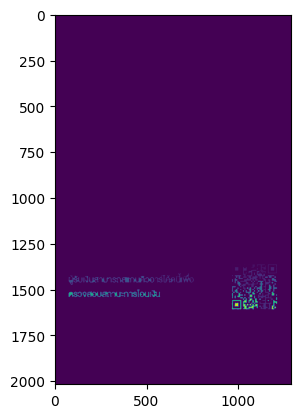

In [50]:

label_image = measure.label(closed_mask)
plt.imshow(label_image)

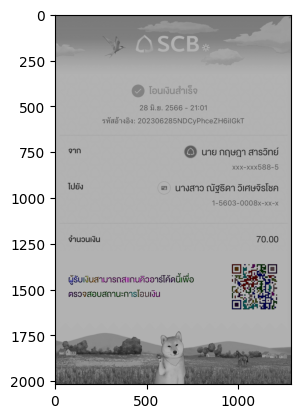

In [51]:
from skimage.color import label2rgb
image_label_overlay = label2rgb(label_image,image=img)
plt.imshow(image_label_overlay)

In [43]:
props = measure.regionpros_table(label_image,img,properties=['label,'])

AttributeError: module 'skimage.measure' has no attribute 'regionpros_table'

In [54]:
import numpy as np

import cv2

kernel = np.ones((2,2),np.uint8)

# load image

img = cv2.imread(r'E-receipt-Dataset\scb\IMG_1063.JPG')

# Convert BGR to HSV

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define range of black color in HSV

lower_val = np.array([0,0,0])

upper_val = np.array([179,100,130])

# Threshold the HSV image to get only black colors

mask = cv2.inRange(hsv, lower_val, upper_val)

# Bitwise-AND mask and original image

res = cv2.bitwise_and(img,img, mask= mask)

# invert the mask to get black letters on white background

res2 = cv2.bitwise_not(mask)

# display image

cv2.imshow("img", res)


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [ ]:

cv2.imshow("img2", res2)
